## **INN Hotels ML 1**

**Context**
A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:

* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

**Objective**
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

**Data Description**
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.




# **Importing libraries**

In [ ]:
# data manipulation libraries for Python
import pandas as pd
import numpy as np

# data visualisation libraires for Python
import matplotlib.pyplot as plt
import seaborn as sns

# statistical libraries for Python
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# prediction libraries for Python (Train/Test + Tree)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    # plot_confusion_matrix, # This function is deprecated, replaced by ConfusionMatrixDisplay
    make_scorer,
    roc_auc_score,
    roc_curve,
)
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay instead

# disable display column & row limits
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)

# Warning filter
import warnings
warnings.filterwarnings("ignore")

**Mounting and reading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Collab Materials/inn.csv')

In [ ]:
#making a copy of the dataset
data_copy=data.copy()

# Data Overview

In [ ]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [ ]:
#viewing the shape of the dataset
data.shape

(36275, 19)

* There are 36275 rows and 19 columns.

In [ ]:
#viewing the datatypes of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

There are:

  * 13 int data types.
  * 5 object data types.
  * 1 float data type.

In [ ]:
#checing for duplicate values in the dataset
data[data.duplicated()].count()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


* There are no duplicate values in the dataset.

In [ ]:
#checking for null values in the dataset
data.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


* There are no null values in the dataset.

In [ ]:
#dropping the booking ID column as it is not needed for the analysis
data=data.drop('Booking_ID',axis=1)

In [ ]:
# viewing the values in the object data type
cat_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
**************************************************
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
**************************************************
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
**************************************************
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
**************************************************


# Exploratory Data Analysis (EDA)

**Statistical summary of the dataset**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


* Avg no of adult is 2 and since the standard deviation is also 2 the dataset is normally distributed.
* There are outliers with respect to the number of children as parents don't briong their children with them to stay at the hotel.
* The avg price per room is €103 while the median is €99 which indicates there is a slight skewness.
* Most people have cancelled their booking.

# Exploratory Data Analysis (EDA)

**Univariate Analysis**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Lead time observation**

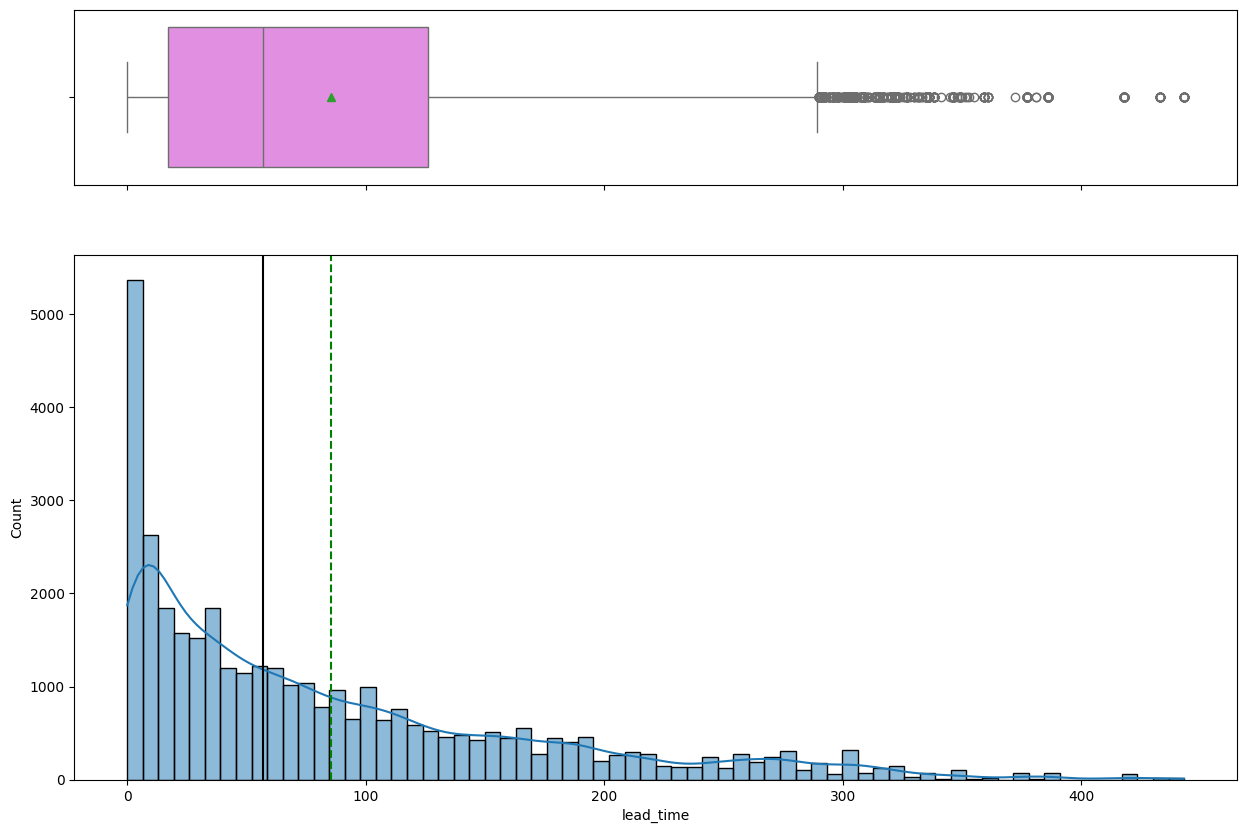

In [ ]:
histogram_boxplot(data,'lead_time',kde=True)

* The distribution is skewed to the right and there are many outliers.
* Most customer made their booking on the day of arrival i.e day 0.
* There are some customers who made their booking 100 to 300 days in advance as well.

**Avg price observation**

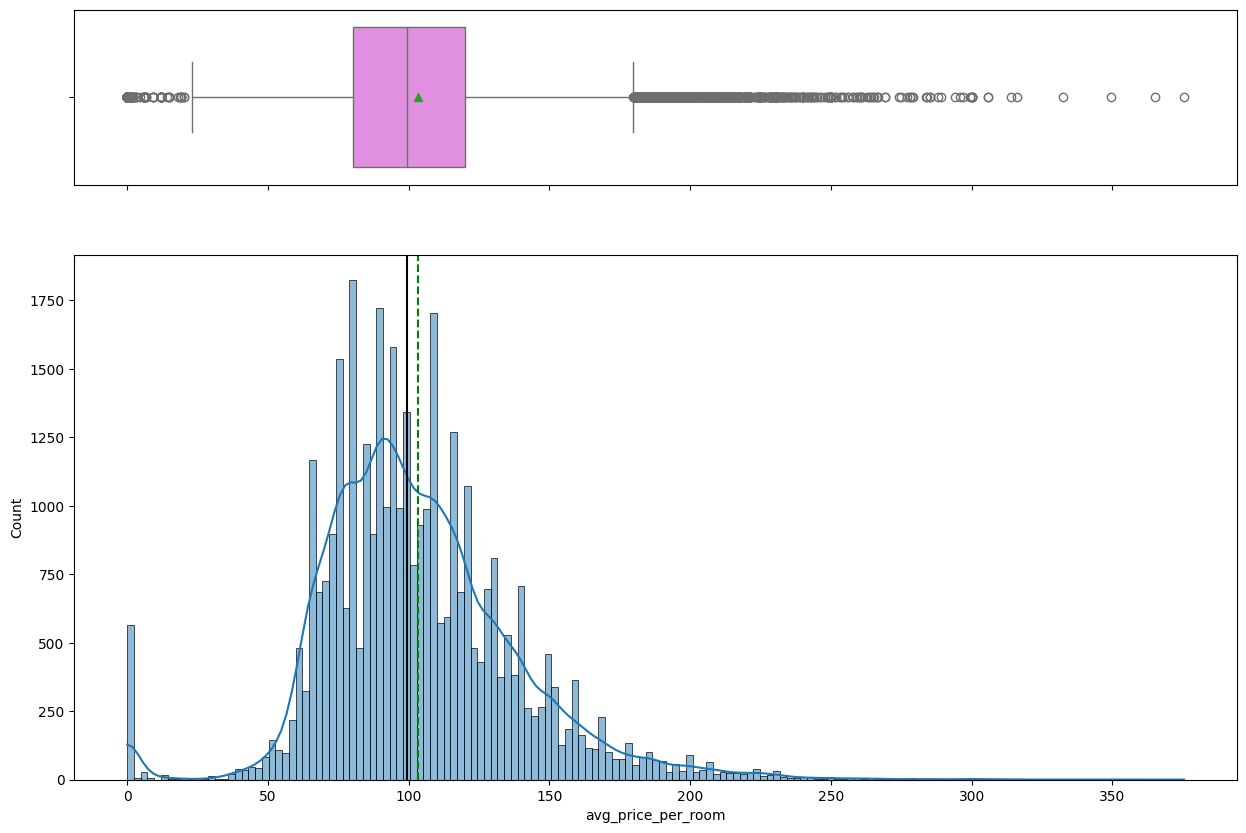

In [ ]:
histogram_boxplot(data,'avg_price_per_room',kde=True)

* There are outliers on both the sides and the curve is slightly skwed to the right.
* The avg price of the room per night is around €100.
* There are rooms with a price of €0 which has to be checked.

**€0 room observation**

In [ ]:
data[data['avg_price_per_room']==0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


In [ ]:
data.loc[data['avg_price_per_room']==0,'market_segment_type'].value_counts()

,count
market_segment_type,
Complementary,354
Online,191


* There are some rooms which were given free at €0 as they were complimentary.
* The rooms that were booked online and were given free at €0 must be a part of some promotional offer conducted by the hotel.

In [ ]:
#Calculating the 25th quartile of the average room price
Q1 = data['avg_price_per_room'].quantile(0.25)

#Calculating the 75th quartile of the average room price
Q3 = data['avg_price_per_room'].quantile(0.75)

#IQR
IQR = Q3 - Q1

#Calculating the upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [ ]:
#Assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

**Previous bookings cancellation observation**

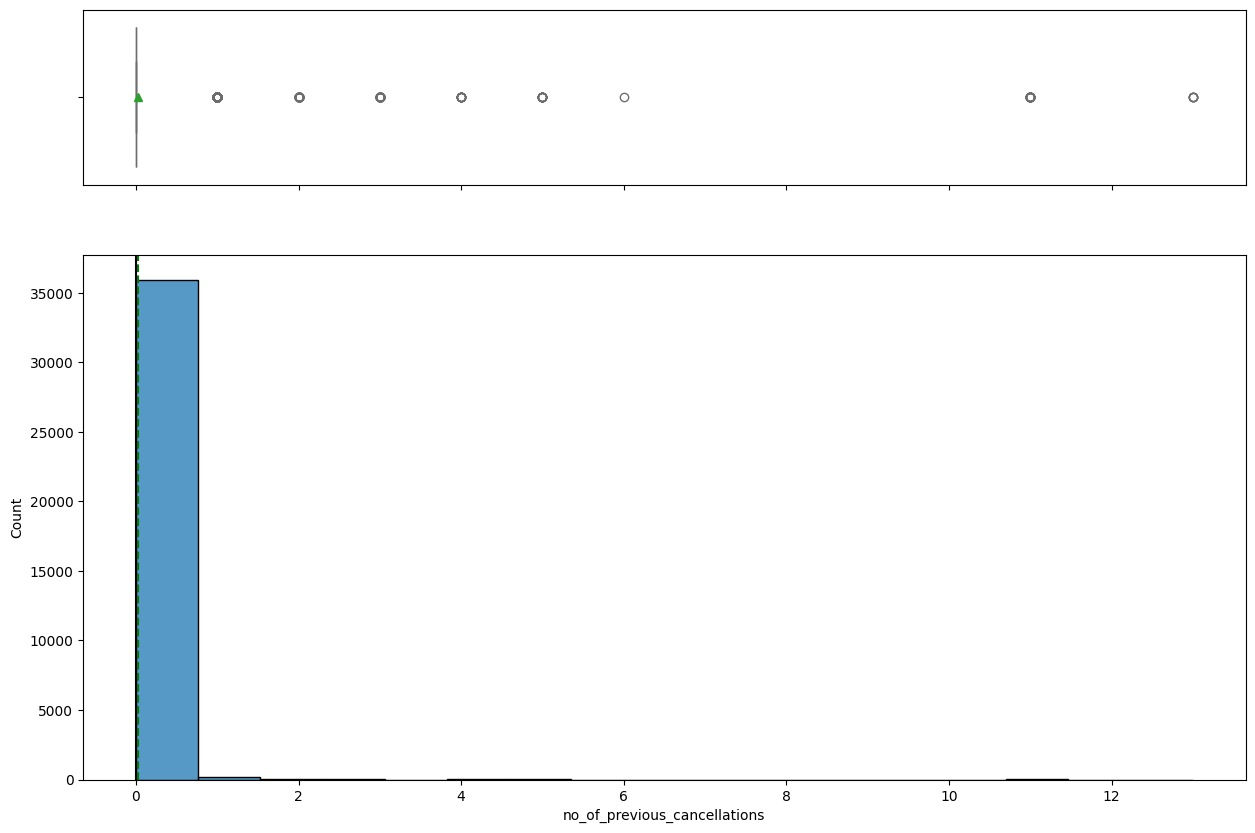

In [ ]:
histogram_boxplot(data,'no_of_previous_cancellations')

* Mostly customers who cancelled previously only cancelled 1 time while there are some outliers.

**Previous bookings not cancelled observation**

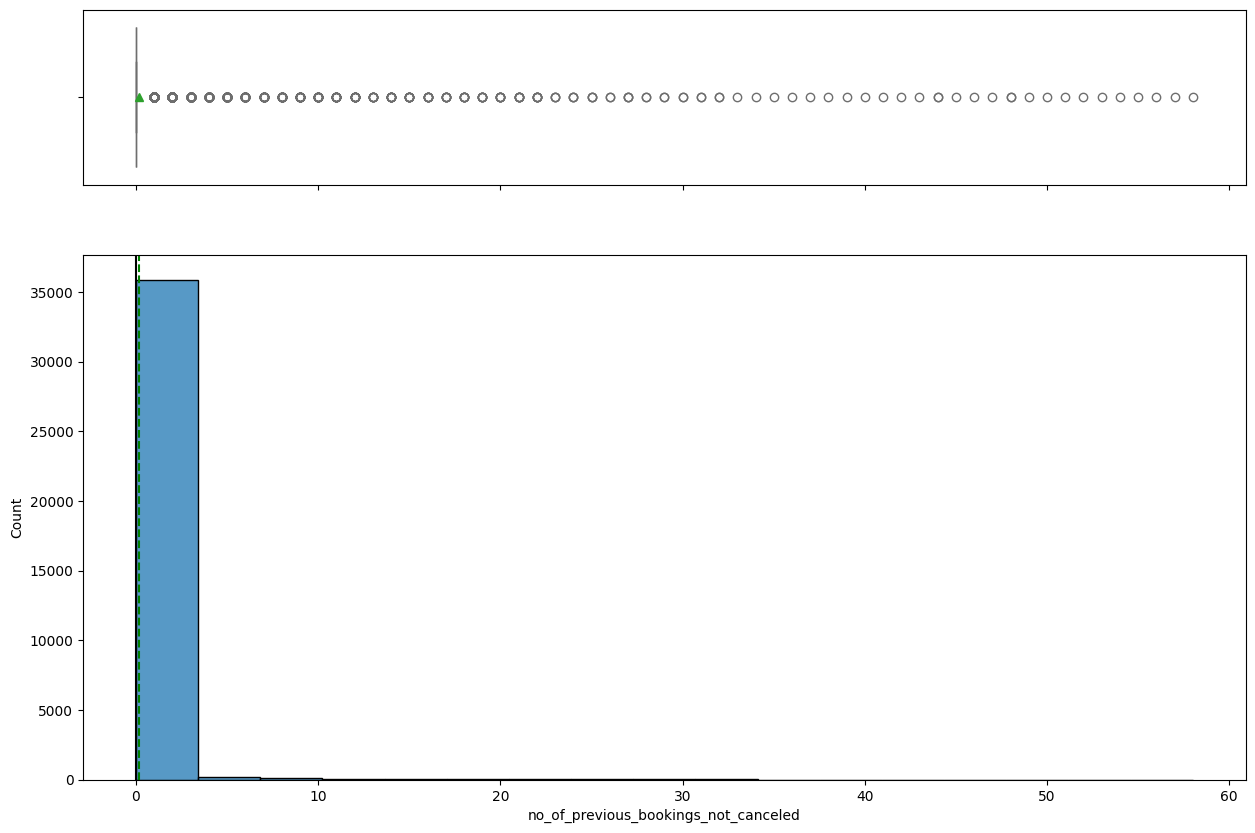

In [ ]:
histogram_boxplot(data,'no_of_previous_bookings_not_canceled')

* Most of the customers did not cancel their bookings previously.

In [ ]:
#Function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**No of adults observation**

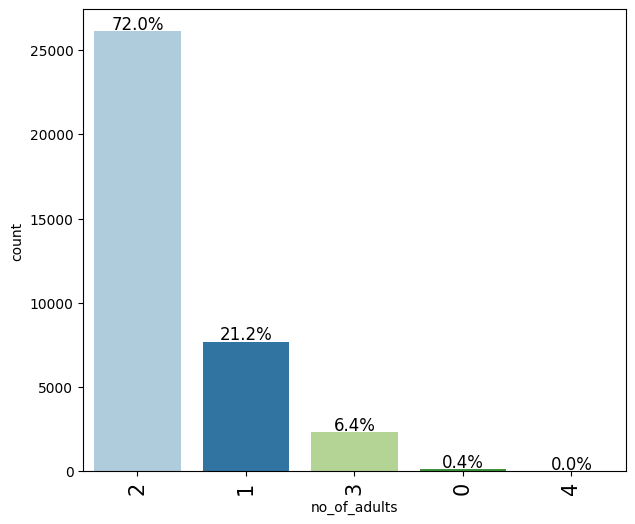

In [ ]:
labeled_barplot(data,'no_of_adults', perc=True)

* 72% bookings were made for 2 adults.
* 21.2% bookings were made for 1 adult.
* The trend indicates that mostly couples and solo travellers preferred to stay at the hotel.

**No of children observation**

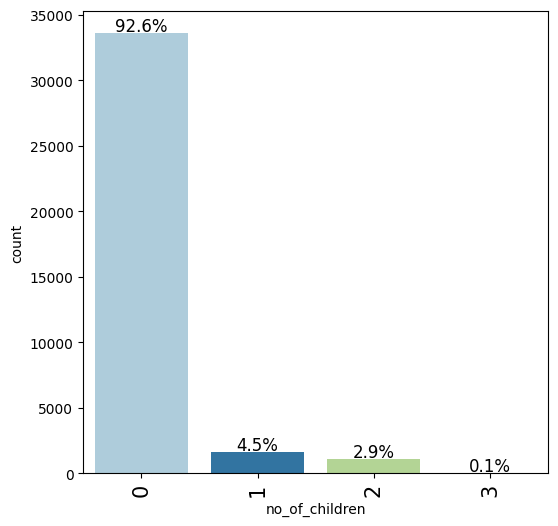

In [ ]:
labeled_barplot(data,'no_of_children',perc=True)

In [ ]:
#Replacing 9 and 10 children with 3
data['no_of_children'] = data['no_of_children'].replace([9,10],3)

* 92.6% did not make any reservation for their children.
* There are some outliers of 9 & 10 childrenwhich are unlikely hence it is being replaced with the maximum value i.e 3.

**No of week nights observation**

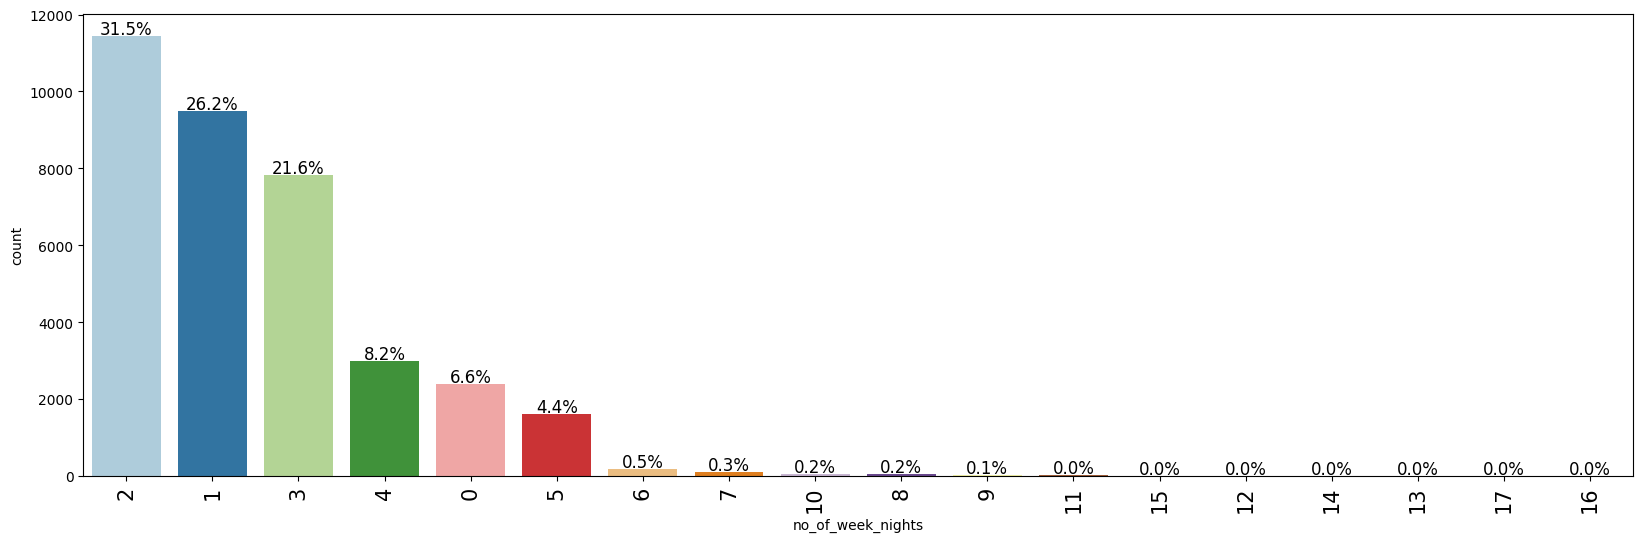

In [ ]:
labeled_barplot(data,'no_of_week_nights',perc=True)

* 31.5% of the bookings were done for 2 nights.
* 26.2% of the bookings were done for 1 night.
* 21.6% bookings were done for 3 nights.

**No of weekend nights observation**

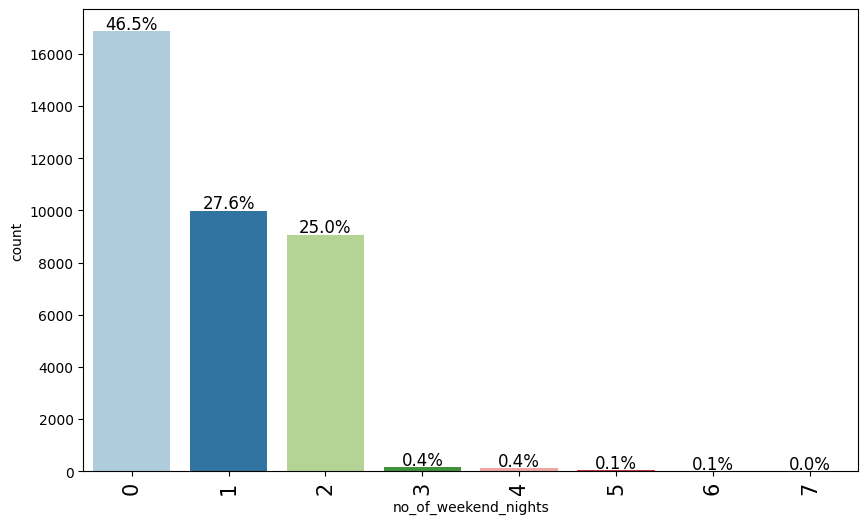

In [ ]:
labeled_barplot(data,'no_of_weekend_nights',perc=True)

* 46.5% of the customersdo not want to spend their weekend at the hotel.
* The percentage of customers who spent 1 & 2 nights at the hotel are almost the same.

**Required car parking space observation**

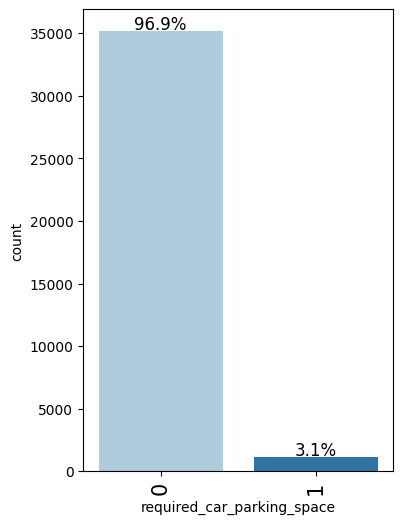

In [ ]:
labeled_barplot(data,'required_car_parking_space',perc=True)

* 96.9% of the customers did not require a car parking space while only 3% of the customers did require it.

**Type of meal plan observation**

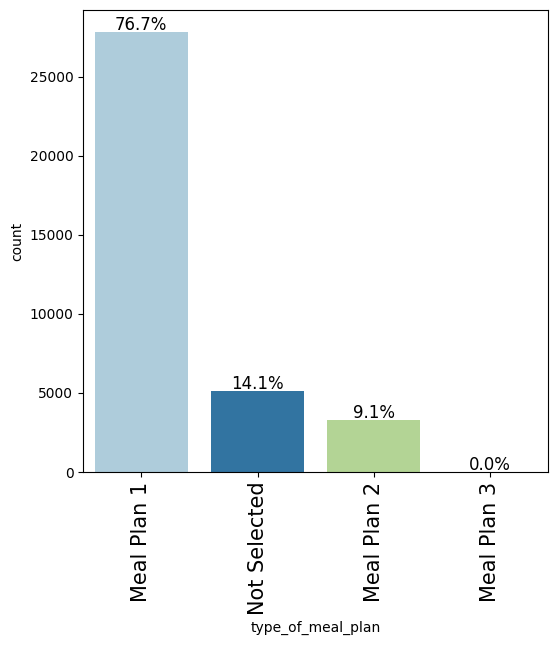

In [ ]:
labeled_barplot(data,'type_of_meal_plan',perc=True)

* Most of the customers (76.7%) preferred meal plan 1.
* While 14.1% of the customers did not select any meal plan.
* 9.1% of the customers preferred meal plan 2.


**Room type reserved observation**

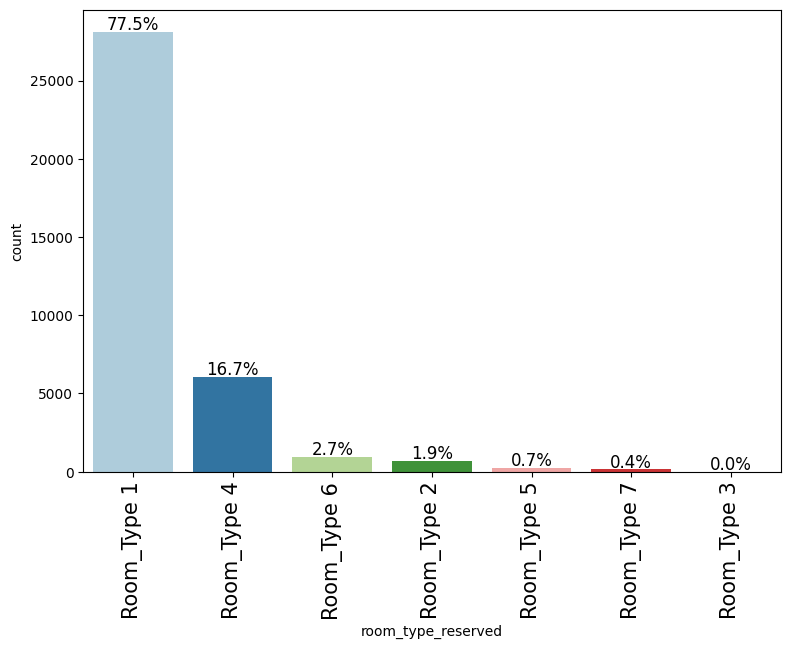

In [ ]:
labeled_barplot(data,'room_type_reserved',perc=True)

* 77.5% of the customers preferred room type 1 followed by 16.7% preferred room type 4.

**Arrival month observation**

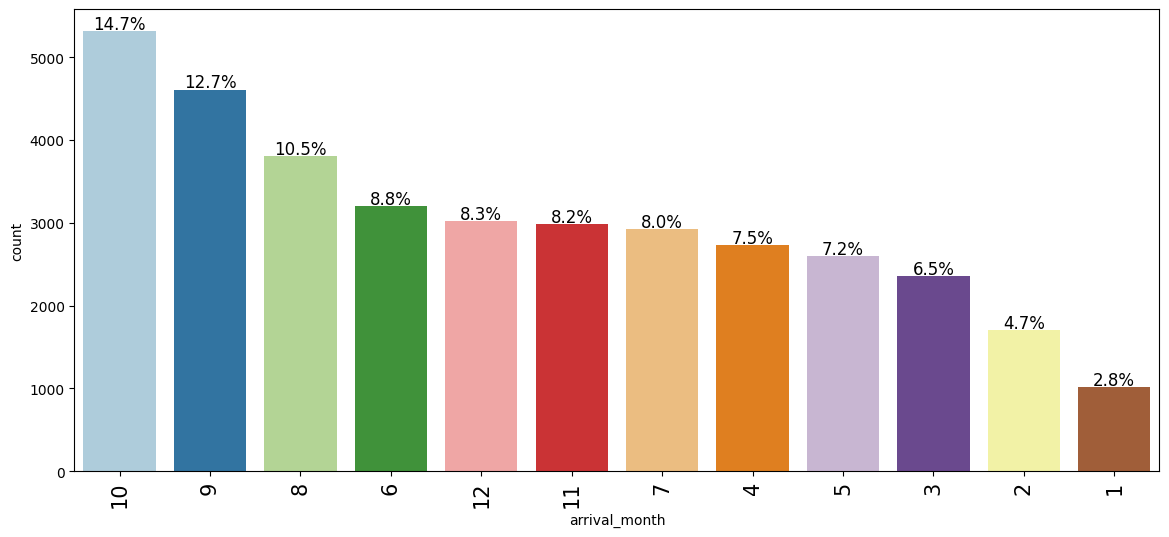

In [ ]:
labeled_barplot(data,'arrival_month',perc=True)

* October is the busiest month with 14.7% bookings followed by September 12.7% bookings and August with 10.5% of the bookings.

**Market segment type observation**

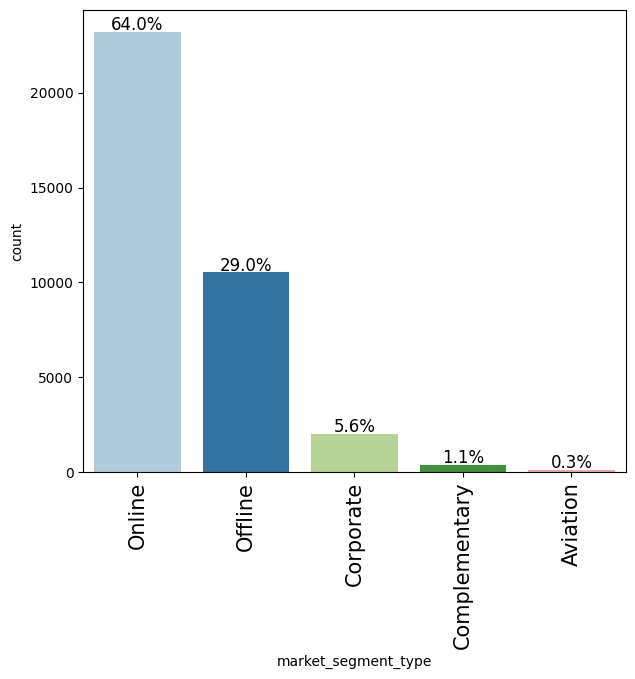

In [ ]:
labeled_barplot(data,'market_segment_type',perc=True)

* Majority i.e 64% of the bookings were made online and 29% bookings were made offline.

**No of special requests observation**

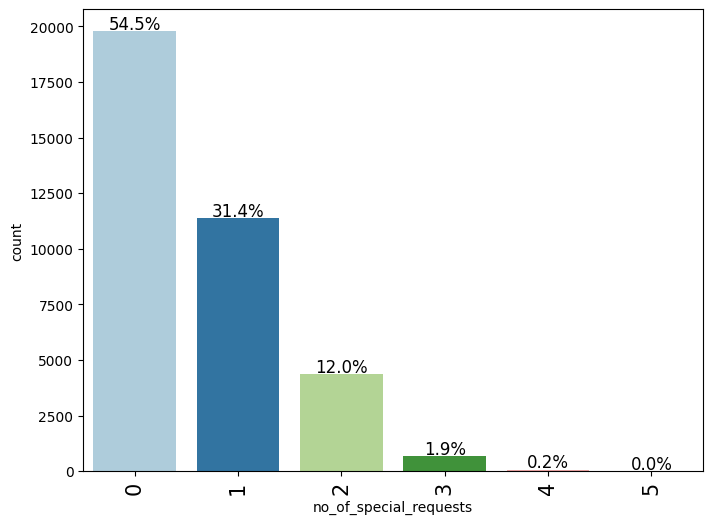

In [ ]:
labeled_barplot(data,'no_of_special_requests',perc=True)

* Mostly customers do not make any special requests while booking the room.

**Booking status observation**

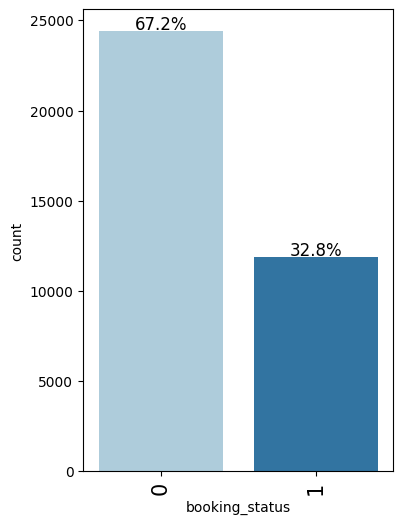

In [ ]:
labeled_barplot(data,'booking_status',perc=True)

In [ ]:
#Change Not Cancelled booking to 0 and Cancelled booking as 1 for further analysis
data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

* 32.8% bookings were cancelled by the customers which is really high for a hotel.

**Bivariate Analysis**

**Correlation**

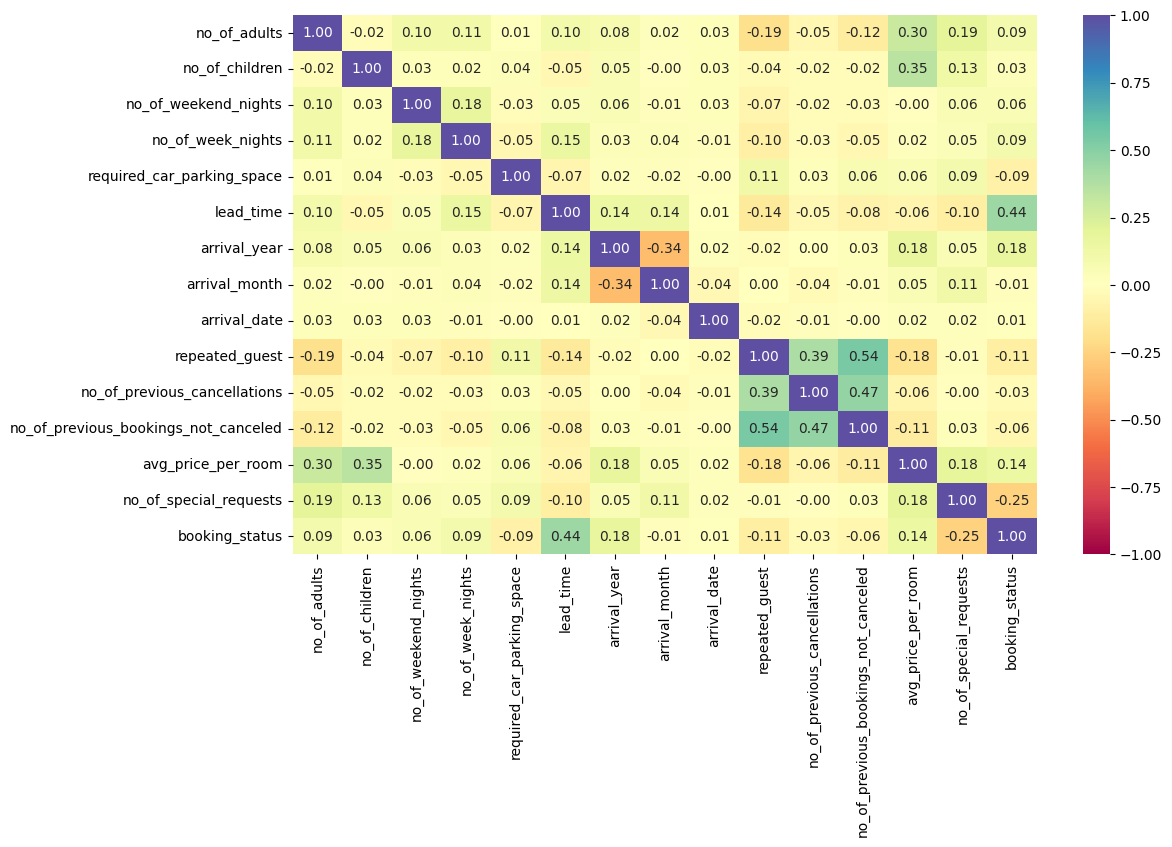

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12,7))
sns.heatmap(data[cols_list].corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()


* There is a positive correlation between the avg price of the room and the no of customers meaning more customers equals to more price.
* There is a positive corelation between the booking status and the lead time meaning higher the lead time higher the chances of cancellation.
* There is a positive correlation between the previous booking not cancelled and previous booking cancelled by the customer.
* There is a negative correlation between repeat guests and the room price meaning the hotel might be giving loyalty benifits to the customer.
* There is a negative correlation between the no of special requests and the booking status meaning if the custome has made special requests while booking then the chances of cancellation decreases.


In [ ]:
#Creating functions that will help with further analysis
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Avg price per room vs Market segment**

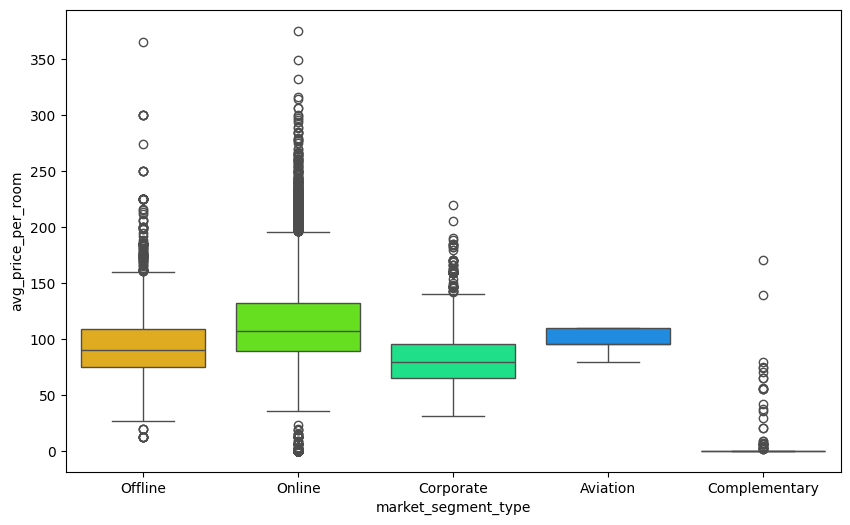

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='market_segment_type',y='avg_price_per_room',palette='gist_rainbow')
plt.show()

* Offline and corporate prices are almost similar.
* Online prices has higher prices.
* Complementary rooms are priced at €0.

**Market segment type vs Booking status**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


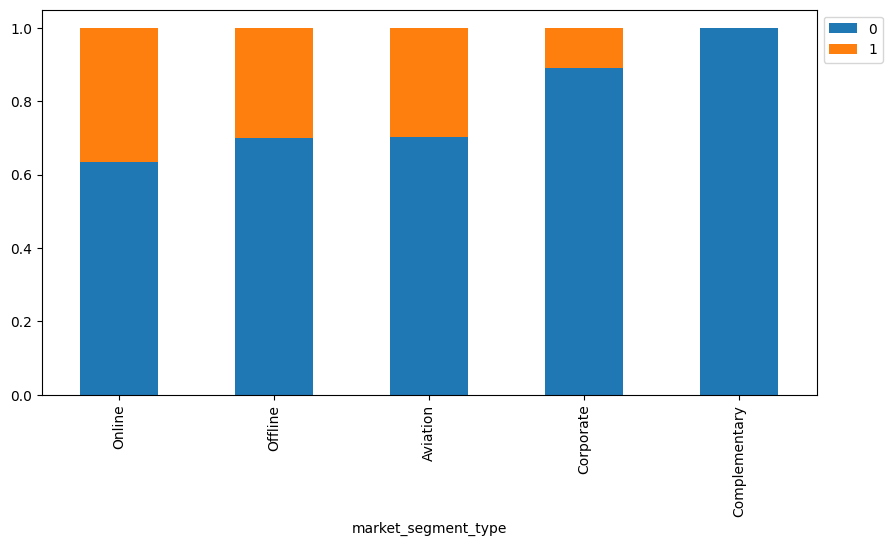

In [ ]:
stacked_barplot(data,'market_segment_type','booking_status')

* Complimentary rooms were never cancelled.
* Corporate bookings had the least cancellation.
* Online bookings about 40% had cancellation and is the highest.
* While offline and aviation had the same no of cancellations.

**No of special requests vs Booking status**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


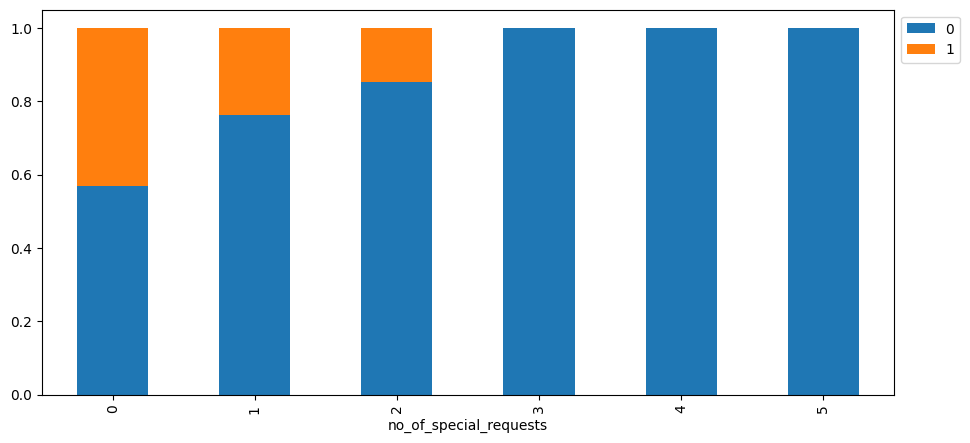

In [ ]:
stacked_barplot(data,'no_of_special_requests','booking_status')

* There were high chances of customers not cancelling the bookings if they had special requests.

**No of special requests vs Avg price per room**

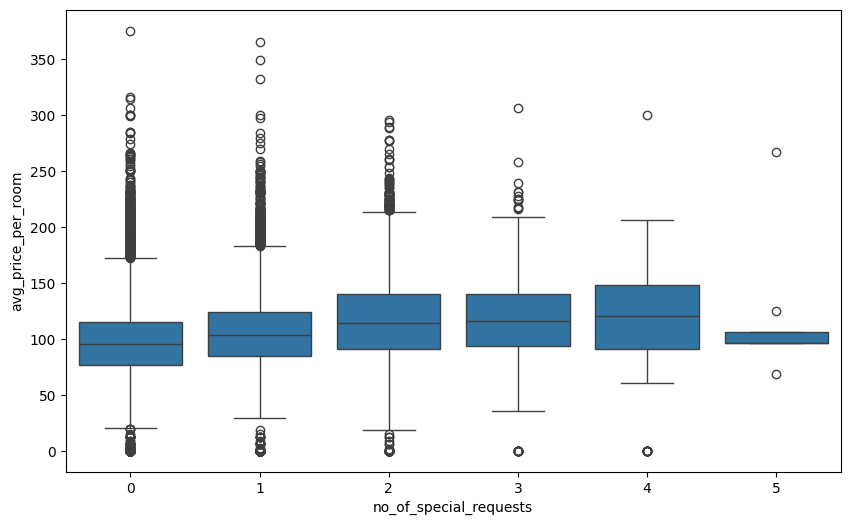

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='no_of_special_requests',y='avg_price_per_room')
plt.show()

* Rooms with special requests had a higher price compared to the rooms they did not have any special requests.

**Bivariate analysis on Avg price per room vs Booking status**

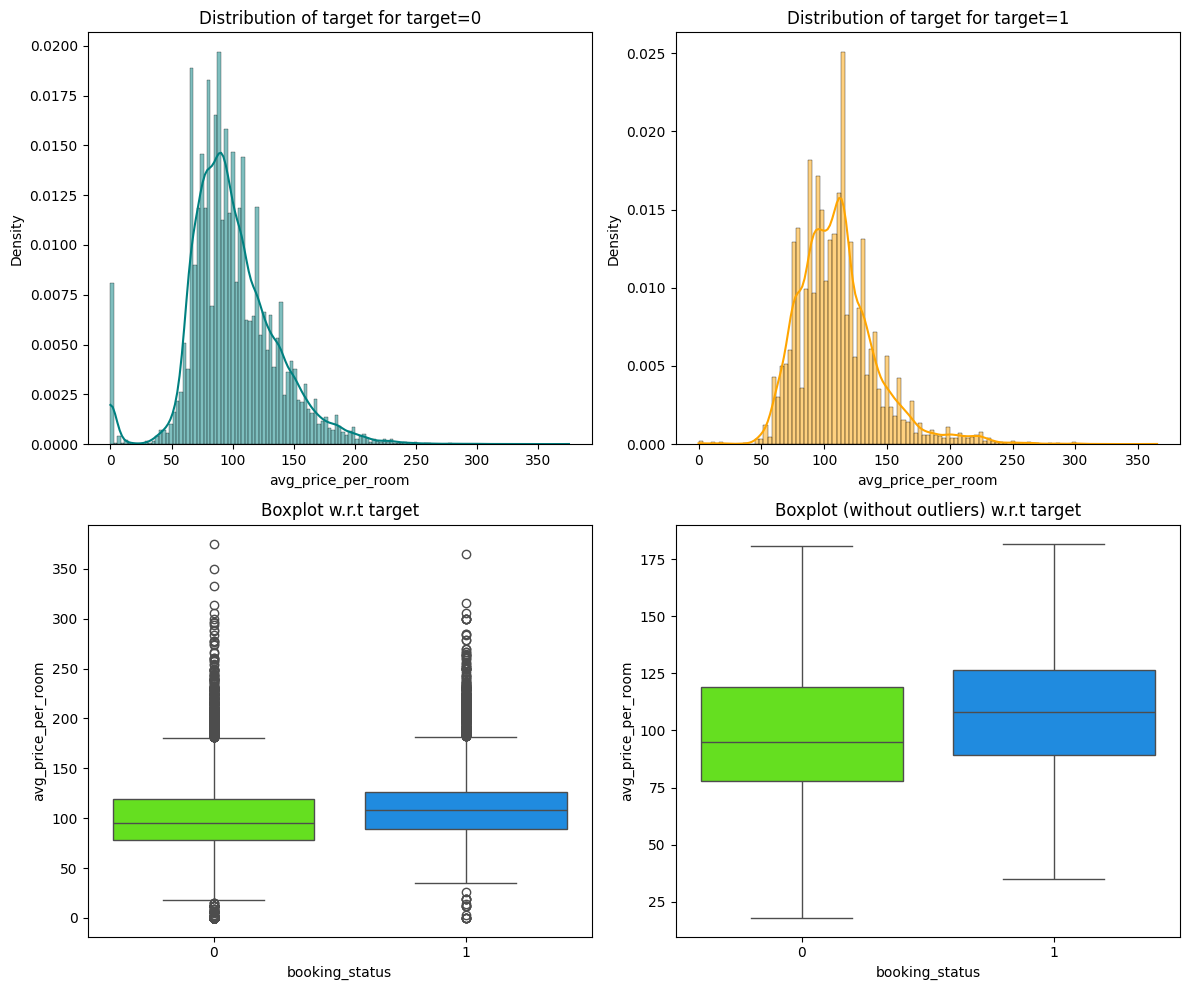

In [ ]:
distribution_plot_wrt_target(data, 'avg_price_per_room', 'booking_status')

* Prices of cancelled bookings are higher than the bookings that were not cancelled.
* Distribution for cancelled and not cancelled bookings is very similar.

**Bivariate analysis on Lead time vs Booking status**

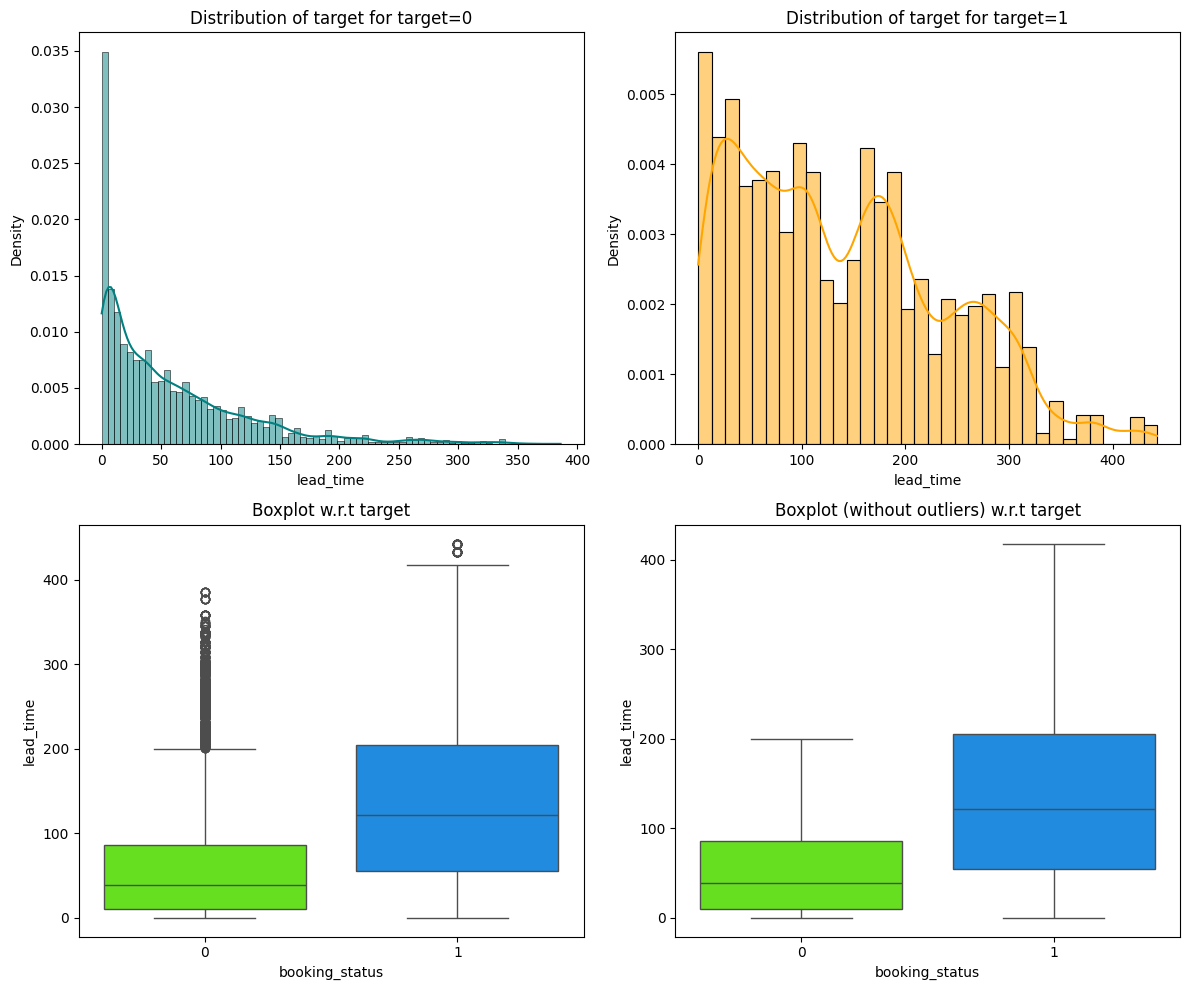

In [ ]:
distribution_plot_wrt_target(data, 'lead_time', 'booking_status')

* There is a big difference in the lead time for the bookings that were cancelled and the bookings that were not cancelled.
* Higher lead time results in higher chance of booking cancellation.

In [ ]:
family_data = data[(data['no_of_children']>=0) & (data['no_of_adults']>1)]
family_data.shape

(28441, 18)

In [ ]:
family_data['no_of_family_members'] = (family_data['no_of_children'] + family_data['no_of_adults'])

**Bivariate analysis on No of family members vs Booking status**

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


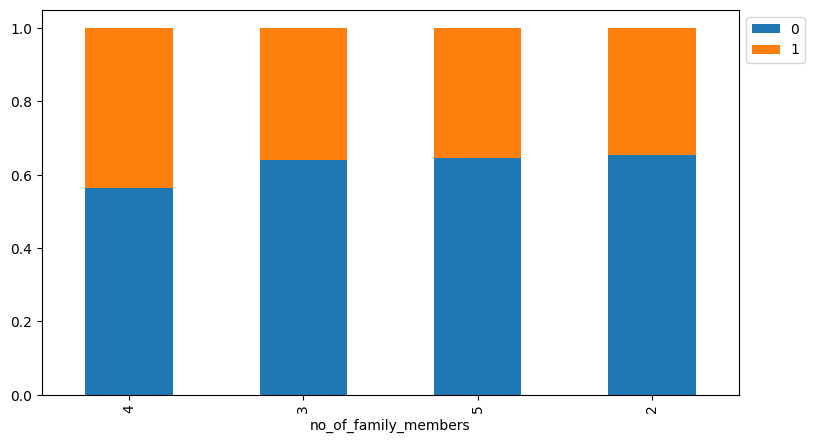

In [ ]:
stacked_barplot(family_data,'no_of_family_members','booking_status')

* Higher the no of family members the higher the chances of booking cancellation.

In [ ]:
day_data = data[(data['no_of_week_nights']>0) & (data['no_of_weekend_nights']>0)]
day_data.shape

(17094, 18)

In [ ]:
day_data['total_days'] = (day_data['no_of_week_nights'] + day_data['no_of_weekend_nights'])

**Bivariate analysis on Arrival month vs Booking status**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


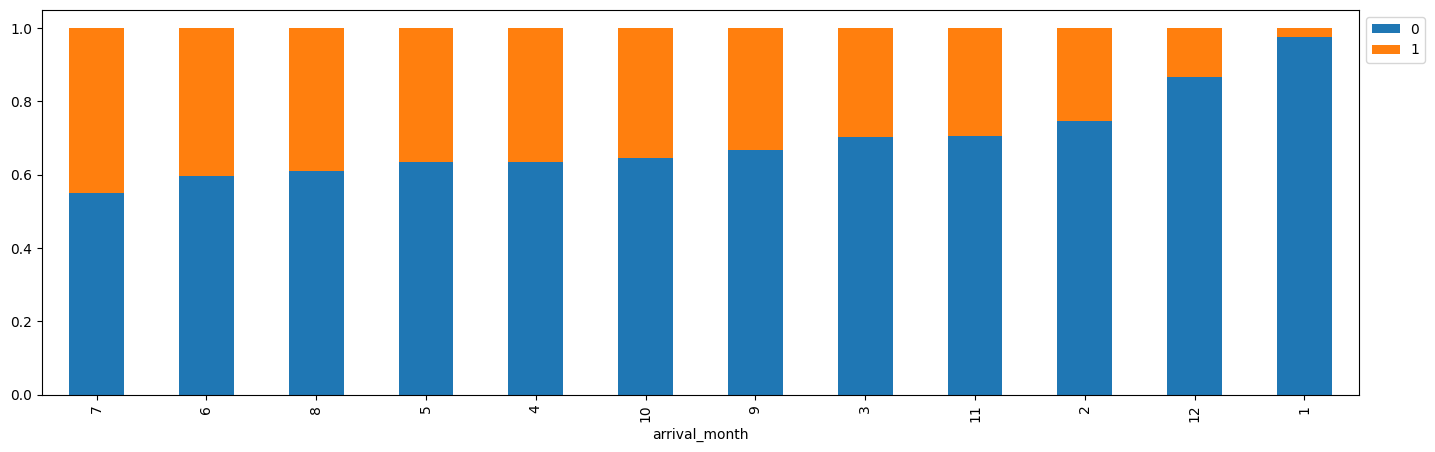

In [ ]:
stacked_barplot(data,'arrival_month','booking_status')

* The highest no of booking cancellation was in the month of July.
* The lowest no of booking cancellation was in the month of January.
* While the highest bookings were made in the month of September and October there was a 40% cancellation rate.

**Bivariate analysis on Repeated guests vs Booking status**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


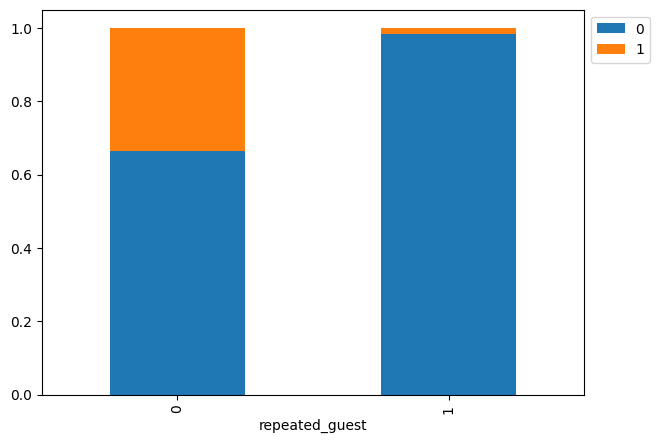

In [ ]:
stacked_barplot(data,'repeated_guest','booking_status')

* There are a very few repeat guests but the cancellation among the repeat guests are also the least.
* It indicates that attracting a new custome is costly and a tedious task while loyal guests are usually more profitable.

**Bivariate analysis on No of guests vs Month**

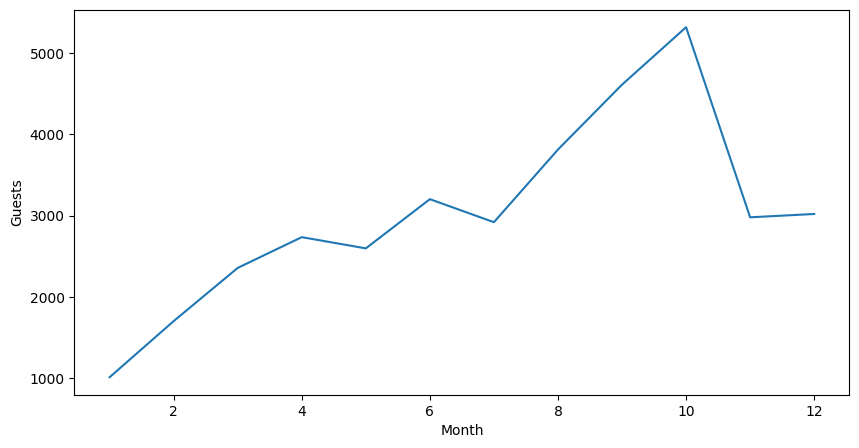

In [ ]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

* The least no of bookings were made in the month of January which had only 1000 bookings
* Most no of bookings were made in the month of October which had a little over 5000 bookings.  

**Bivariate analysis on Arrival month vs Booking status**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


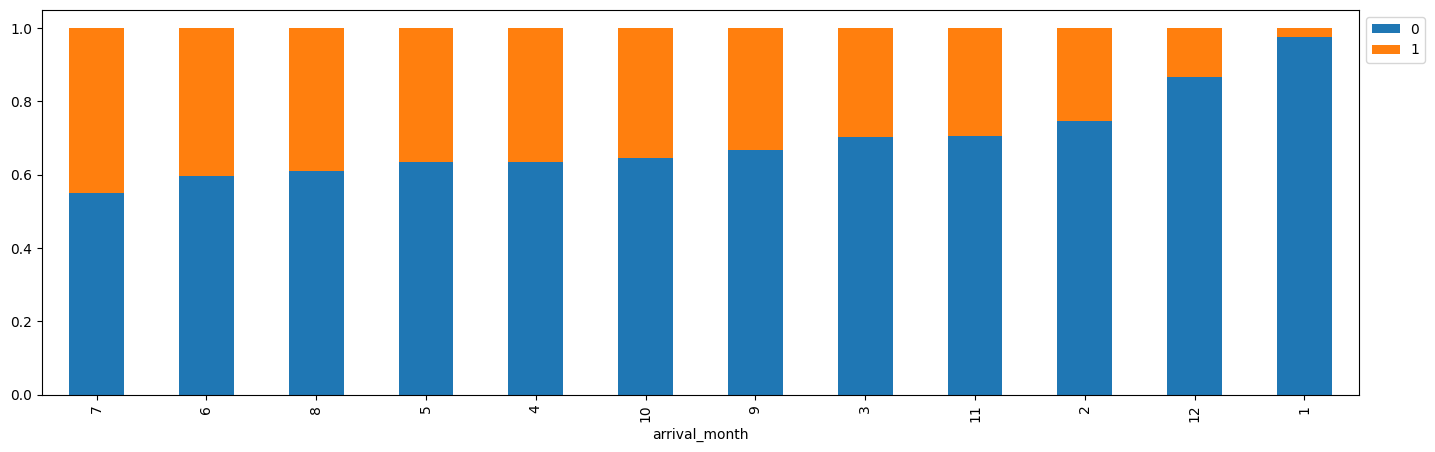

In [ ]:
stacked_barplot(data,'arrival_month','booking_status')

* Though the highest no of bookings are made for the month of September and October there is a 40% cancellation rate while January had the lest no of booking it also had the least no of booking cancellation.

**Bivariate analysis on Arrival month vs Avg price per room**

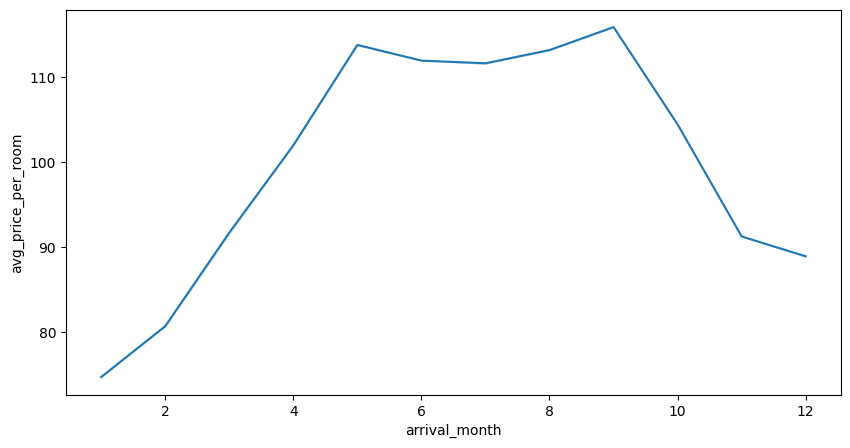

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data,x='arrival_month',y='avg_price_per_room',ci=False)
plt.show()

* The rooms cost the highest from May to October, it costs €115 on a average.

# Data Preprocessing

**Outliers check**

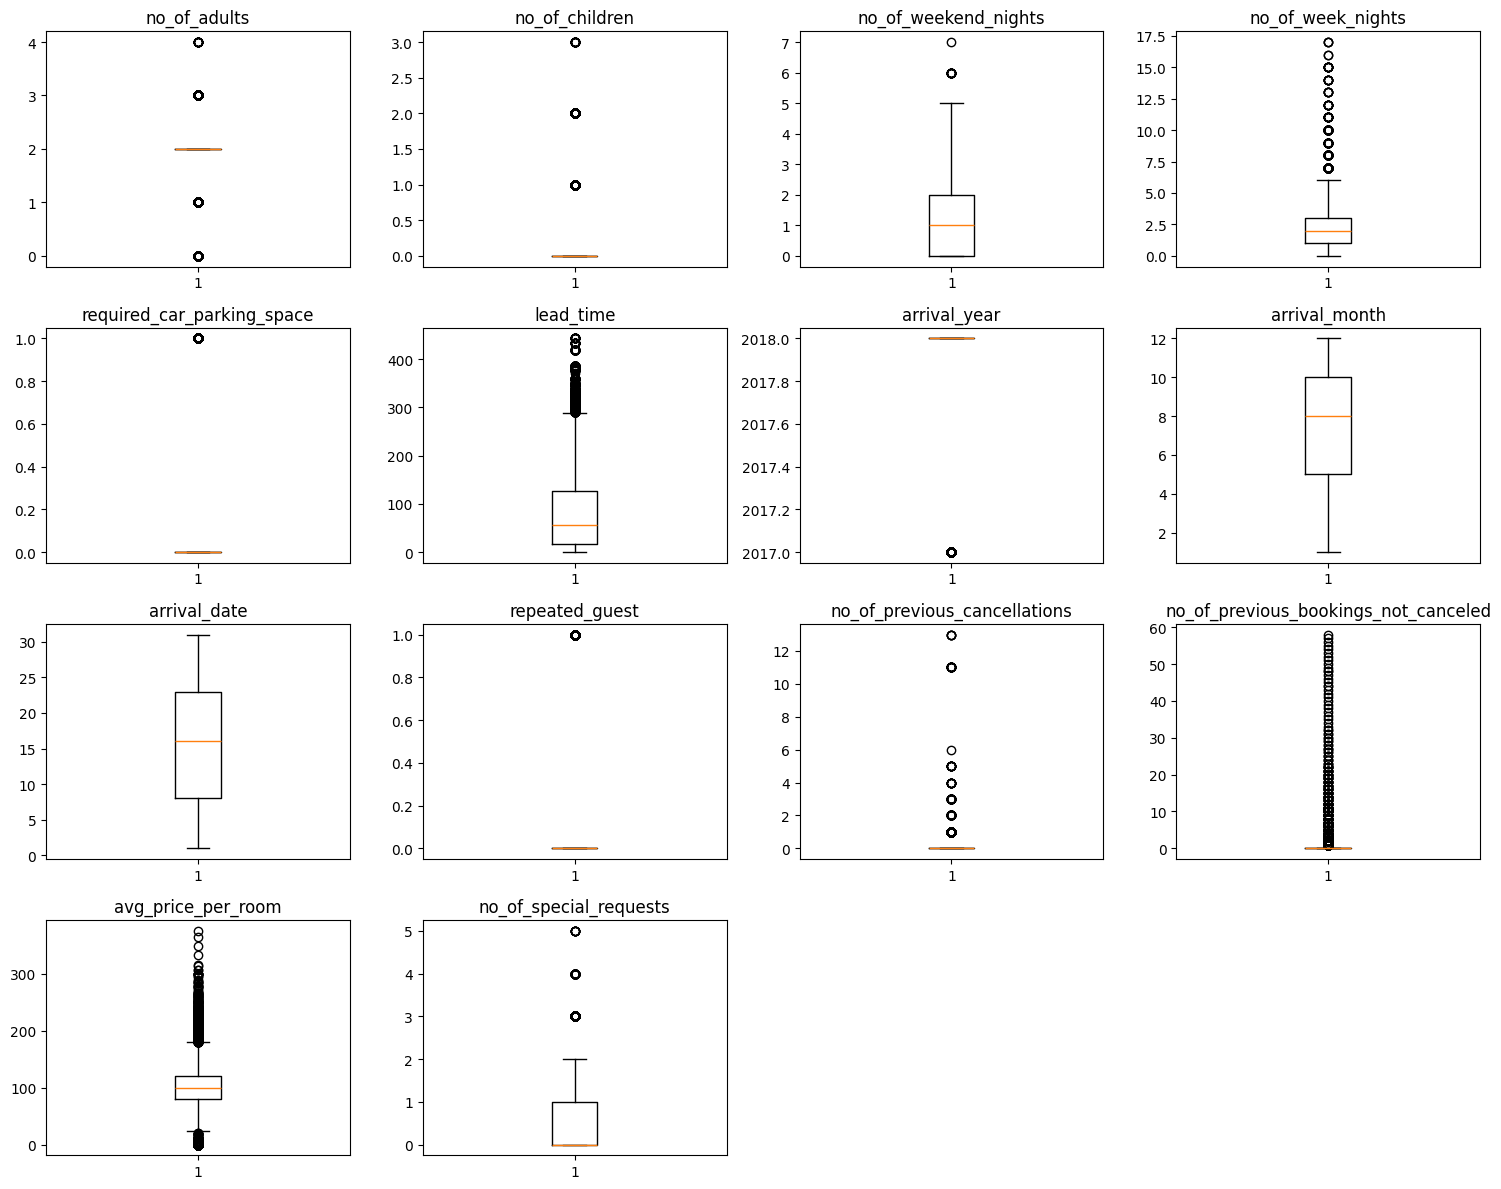

In [ ]:
#Outlier detection using boxplot
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
#Dropping booking status
numerical_cols.remove('booking_status')
#Formula for outlier detection
plt.figure(figsize=(15,12))

for i, variable in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    plt.boxplot(data[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are outliers present and we are keeping it as it is important in analyzing the data further.

# Model Building

Metric Functions

In [ ]:
#Computing different functions to check performance
def model_performance_classification_statsmodels(model,predictors,target,threshold=0.5):
    #Checking which probabilities are greater than the threshold
    pred_temp = model.predict(predictors)>threshold
    #Rounding off the variables
    pred = np.round(pred_temp)

    #Metrics being used for model performance
    acc = accuracy_score(target,pred) #To compute the accuracy score
    recall = recall_score(target,pred) #To compute the recall score
    precision = precision_score(target,pred) #To compute the precision score
    f1 = f1_score(target,pred) #To compute the f1 score

    #Creating a dataframe for the metrics
    df_perf = pd.DataFrame({'Accuracy':acc,'Recall':recall,'Precision':precision,'F1':f1,},index=[0],)

    return df_perf

In [ ]:
#Computing the confusion matrix
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Logistic Regression**

**Data preparation for modelling**

In [ ]:
#Independent and dependent variables being defined
x = data.drop(['booking_status'],axis=1)
y = data['booking_status']

#Adding constant
X = sm.add_constant(x)
X = pd.get_dummies(X,drop_first=True)

#Create a train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
print('Shape of the training set:',X_train.shape)
print('Shape of test set:', X_test.shape)
print('Percentage of Classes in Training Set:',y_train.value_counts(normalize=True))
print('Percentage of Classes in Test Set:',y_test.value_counts(normalize=True))

Shape of the training set: (25392, 28)
Shape of test set: (10883, 28)
Percentage of Classes in Training Set: booking_status
0    0.670644
1    0.329356
Name: proportion, dtype: float64
Percentage of Classes in Test Set: booking_status
0    0.676376
1    0.323624
Name: proportion, dtype: float64


**Building the Logistic Regression Model**

In [ ]:
#Fitting the logistic regression model
logit = sm.Logit(y_train,X_train.astype(float))
lg = logit.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 01 Feb 2025   Pseudo R-squ.:                  0.3292
Time:                        16:53:16   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

* Negative values of the coefficient show that the probability of
customers canceling the booking decreases with the increase of the corresponding attribute value.
* Positive values of the coefficient show that the probability of
customer canceling increases with the increase of corresponding
attribute value.
* p-value of a variable indicates if the variable is significant or not. If we
consider the significance level to be 0.05 (5%), then any variable with
a p-value less than 0.05 would be considered significant.
* But these variables might contain multicollinearity, which will affect
the p-values.
* Multicollinearity from the data needs to be removed to get reliable coefficients and p-values.
coefficients and p-values.
* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

In [ ]:
#Independent and dependent variables being defined
x = data.drop(['booking_status'],axis=1)
y = data['booking_status']

#Adding constant
X = sm.add_constant(x)
X = pd.get_dummies(X,drop_first=True)

# Explicitly convert all columns in X to numeric (float)
X = X.astype(float) # Cast to numeric before train-test split

#Create a train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
#Training Performance
print('Training Performance')
model_performance_classification_statsmodels(lg,X_train,y_train)

Training Performance


,Accuracy,Recall,Precision,F1
0,0.806002,0.634103,0.739713,0.682848


**Multicollinearity**

In [ ]:
#We will use VIF to fix the multicollienarity issue
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif['Features'] = predictors.columns

    #Calculating VIF for each feature
    vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range (len(predictors.columns))]

    return vif

In [ ]:
checking_vif(X_train)

,Features,VIF
0,const,3.949769e+07
1,no_of_adults,1.351135e+00
2,no_of_children,2.093583e+00
3,no_of_weekend_nights,1.069484e+00
4,no_of_week_nights,1.095711e+00
5,required_car_parking_space,1.039972e+00
6,lead_time,1.395175e+00
7,arrival_year,1.431904e+00
8,arrival_month,1.276334e+00
9,arrival_date,1.006795e+00


* VIF for dummy variable is ignored.
* Numerical variables doesnt show high or moderate multicolinearity.
* Predictor variable with a p-value of greater than 0.05 will be dropped as they do not significantly impact the target variable.
* Not all the p-values are dropped as once as sometimes p-values change after dropping a variable.
* A new model is then created without the dropped feature and the steps are repeated until there are no p-values greater than 0.05.

**Removing P-values**

In [ ]:
#Initial list of columns
cols = X_train.columns.tolist()

#Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    #Defining the train set
    x_train_aux = X_train[cols]

    #Fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    #Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    #Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

**New Logit Model**

In [ ]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 01 Feb 2025   Pseudo R-squ.:                  0.3282
Time:                        16:53:34   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

**Checking the model performance on the training set**

In [ ]:
print('Training Performance')
model_performance_classification_statsmodels(lg1,X_train1,y_train)

Training Performance


,Accuracy,Recall,Precision,F1
0,0.805451,0.632668,0.73907,0.681742


* All the variables left has a p-value less than 0.05 hence this is the best model for making any inference.
* Also the performance on the training data is the same as before dropping the variables with p-value greater than 0.05.

In [ ]:
#Converting coefficients to odds
odds = np.exp(lg1.params)

#Finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

#Removing limit from number of columns to display
pd.set_option("display.max_columns", None)

#Adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.0,1.11491,1.165459,1.114697,1.042584,0.202961,1.015833,1.571951,0.958388,0.064782,1.257118,1.019368,0.229963,1.178464,1.331095,0.701041,0.753645,0.478845,0.379771,0.238271,0.453263,0.167728
Change_odd%,-100.0,11.49096,16.545927,11.469662,4.258406,-79.703947,1.583312,57.195078,-4.161197,-93.521802,25.711810,1.936838,-77.003739,17.846408,33.109465,-29.895882,-24.635508,-52.115481,-62.022895,-76.172939,-54.673731,-83.227238


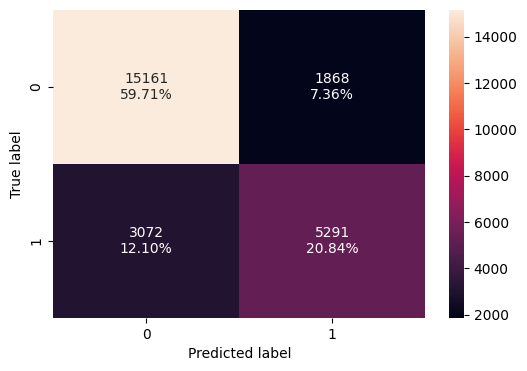

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
log_model_train_perf = model_performance_classification_statsmodels(lg1,X_train1,y_train)

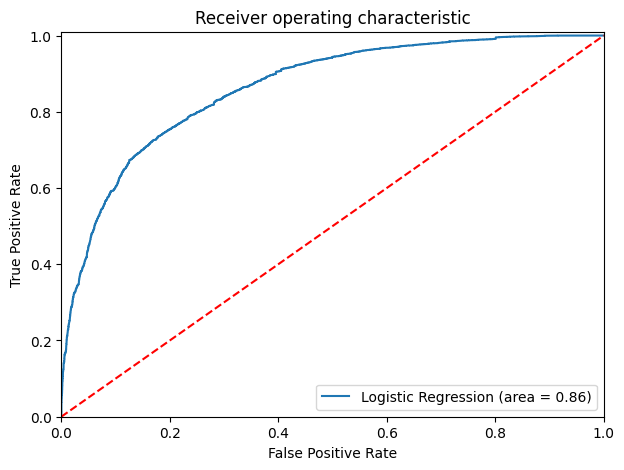

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC curve score of 0.86 on training is good.
* The Logistic Regression model is giving a generalized performance on both the training and the testing set.

**Model improvement**

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558708252


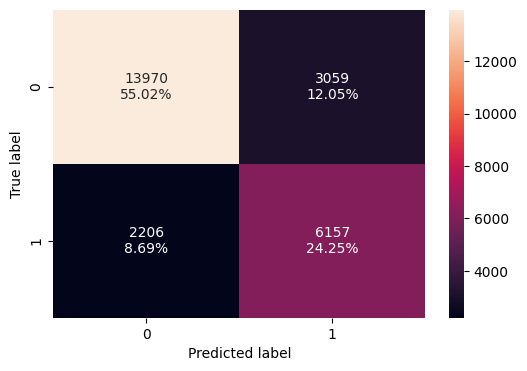

In [ ]:
confusion_matrix_statsmodels(lg1,X_train1,y_train,threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792651,0.736219,0.668077,0.700495


* Recall has increased compared to the previous model.
* As the threshold keeps decreasing the recall will keep on increasing and the precision will decrease hence a optimal balance between the both need to be reached.

**Finding a better threshold using the Precision-Recall Curve**

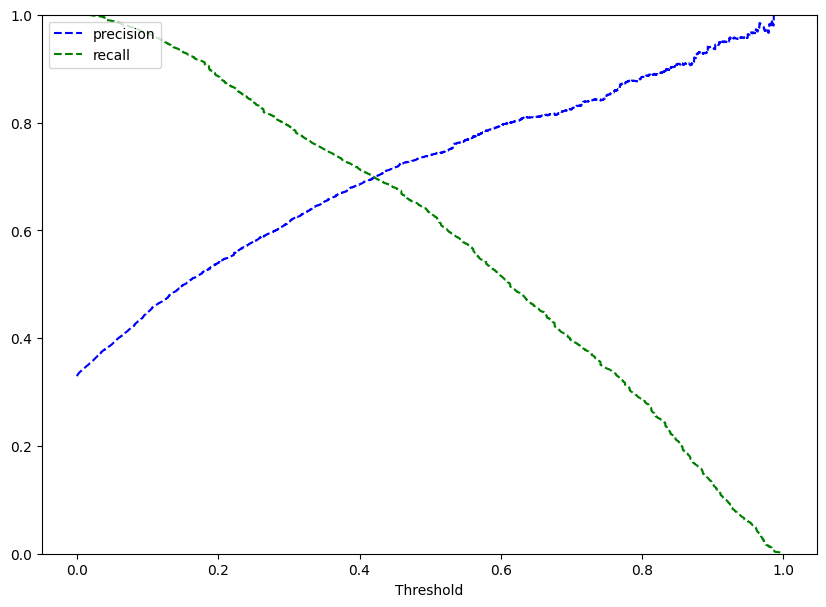

In [ ]:
#Import precision_recall_curve function from sklearn.metrics
from sklearn.metrics import precision_recall_curve

y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
optimal_threshold_recall_precision = 0.42

* At a threshold of 0.42 there is a balance between precision and recall.

**Checking model performance on training set with 0.42 as threshold**

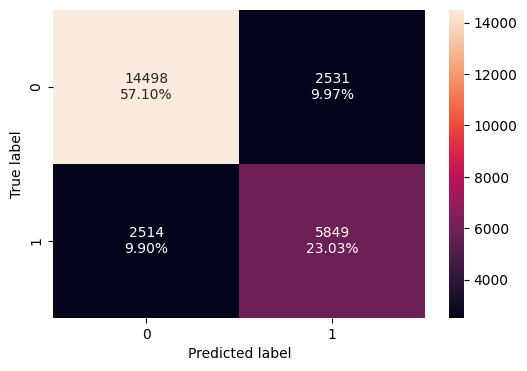

In [ ]:
confusion_matrix_statsmodels(lg1,X_train1,y_train,threshold=optimal_threshold_recall_precision)


In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_recall_precision
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.801315,0.69939,0.697971,0.69868


* The performance of the model has improved compared to the initial model.
* There is a balanced performance in terms of precision and recall.

**Checking the model performance on the test set**

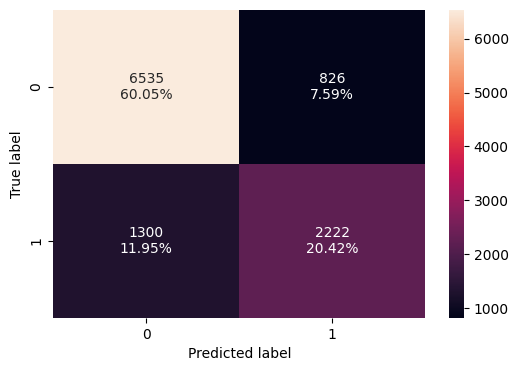

In [ ]:
#Confusion Matrix
confusion_matrix_statsmodels(lg1,X_test1,y_test)

In [ ]:
#Metrics
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1,X_test1,y_test) ## Complete the code to check performance on X_test1 and y_test

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.804649,0.630892,0.729003,0.676408


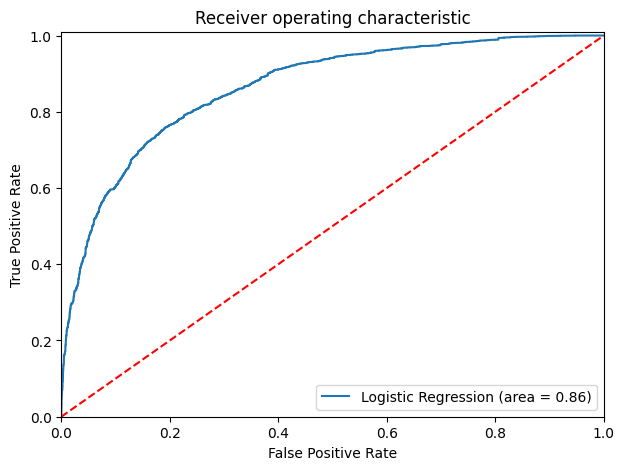

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

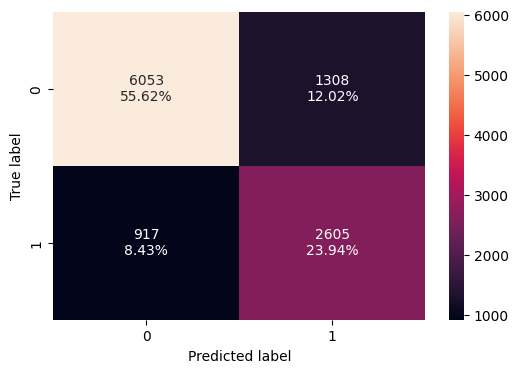

In [ ]:
#Confusion Matrix
confusion_matrix_statsmodels(lg1,X_test1,y_test,optimal_threshold_auc_roc)

In [ ]:
#Metrics
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.795553,0.739637,0.66573,0.70074


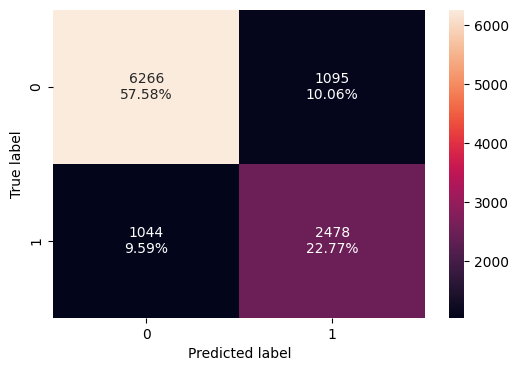

In [ ]:
#Confusion Matrix
confusion_matrix_statsmodels(lg1,X_test1,y_test,optimal_threshold_recall_precision)

In [ ]:
#Metrics
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_recall_precision
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.803455,0.703578,0.693535,0.69852


**Model Performance Summary**

In [ ]:
#Model Comparison Training Set
models_train_comp_df = pd.concat(
    [
        log_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.805451,0.792651,0.801315
Recall,0.632668,0.736219,0.699390
Precision,0.739070,0.668077,0.697971
F1,0.681742,0.700495,0.698680


In [ ]:
#Model Comparison Test set
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.804649,0.795553,0.803455
Recall,0.630892,0.739637,0.703578
Precision,0.729003,0.665730,0.693535
F1,0.676408,0.700740,0.698520


* With an F1 score of 0.69 on the training set, we have developed a predictive model that the hotel can use to identify which reservations are most likely to be cancelled.
* On both training and test sets, the logistic regression models provide a generalised performance.
* The hotel can predict which reservations won't be cancelled and will be able to offer those customers satisfactory services, which helps to maintain brand equity but will cost money. This is achieved by using a model with a default threshold, which will yield a low recall but good precision score.
* The hotel can save money by accurately forecasting the bookings that are likely to be cancelled, but doing so could harm its brand equity. The model with a 0.37 threshold will provide a high recall but poor precision score.
* The hotel will be able to preserve a balance between resources and brand equity by using the model with a 0.42 threshold, which will provide a balanced recall and precision score.
* Required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests, and a few other coefficients are negative; if they grow, the likelihood of a consumer cancelling their reservation will decrease.


**Decision Tree**

In [ ]:
#Creating independent and dependent variables
X = data.drop(['booking_status'],axis=1)
Y = data['booking_status']

#Create dummy variables
X = pd.get_dummies(X, drop_first=True)

#Splitting for training and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:",y_train.value_counts(normalize=True))
print("Percentage of classes in test set:",y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set: booking_status
0    0.670644
1    0.329356
Name: proportion, dtype: float64
Percentage of classes in test set: booking_status
0    0.676376
1    0.323624
Name: proportion, dtype: float64


In [ ]:
#Defining a function to compute the metrics to check a classification model
def model_performance_classification_sklearn(model,predictors,target):
    #Predicting model using independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  #To compute Accuracy
    recall = recall_score(target, pred)  #To compute Recall
    precision = precision_score(target, pred)  #To compute Precision
    f1 = f1_score(target, pred)  #To compute F1-score

    #Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


In [ ]:
#For the confusion matrix
def confusion_matrix_sklearn(model,predictors,target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target,y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

**Building Deciion Tree Model**

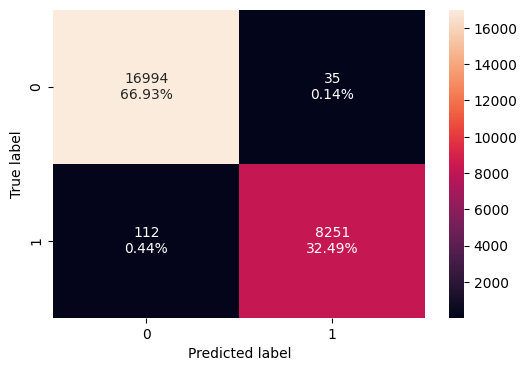

In [ ]:
confusion_matrix_sklearn(model,X_train,y_train)

In [ ]:
decision_tree_perf_train_default = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train_default

,Accuracy,Recall,Precision,F1
0,0.994211,0.986608,0.995776,0.991171


* There are 0 errors in the training set as each sample has been classified correctly.
* Model performance is good on. the training set.

**Checking model performance on test set**

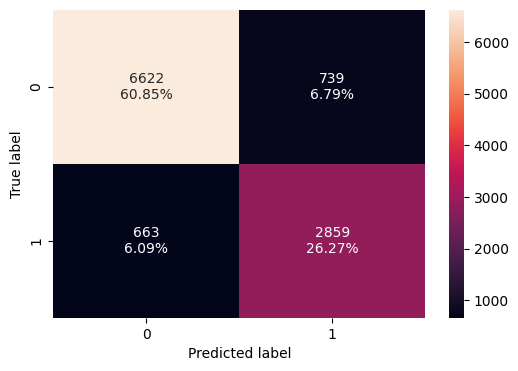

In [ ]:
confusion_matrix_sklearn(model,X_test,y_test)

In [ ]:
decision_tree_perf_test_default = model_performance_classification_sklearn(model,X_test,y_test) ## Complete the code to check performance on test set
decision_tree_perf_test_default

,Accuracy,Recall,Precision,F1
0,0.871175,0.811755,0.794608,0.80309


* The decision tree model is overfitting the dataand is not able to generalize well on the test set.
* Pruning of the decision tree is required.

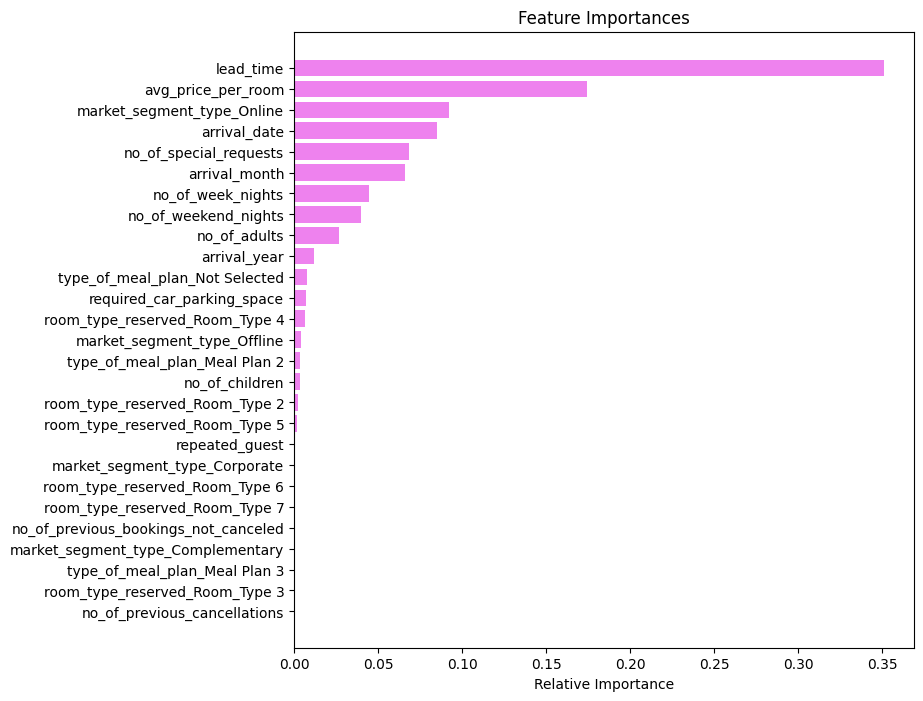

In [ ]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time is the most important factor followed by average price per room.

# Pruning the Tree

**Pre-Pruning the tree**

In [ ]:
#Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

#Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

#Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

#Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

#Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

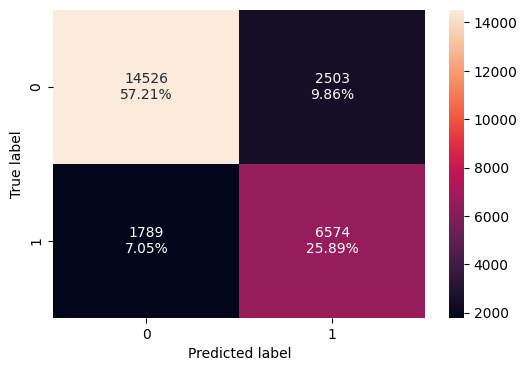

In [ ]:
confusion_matrix_sklearn(estimator,X_train,y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator,X_train,y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.786082,0.724248,0.753899


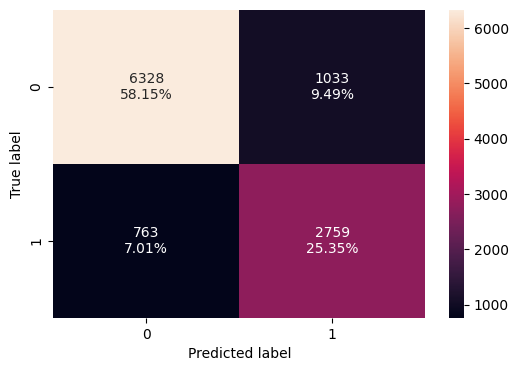

In [ ]:
confusion_matrix_sklearn(estimator,X_test,y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator,X_test,y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.834972,0.783362,0.727584,0.754444


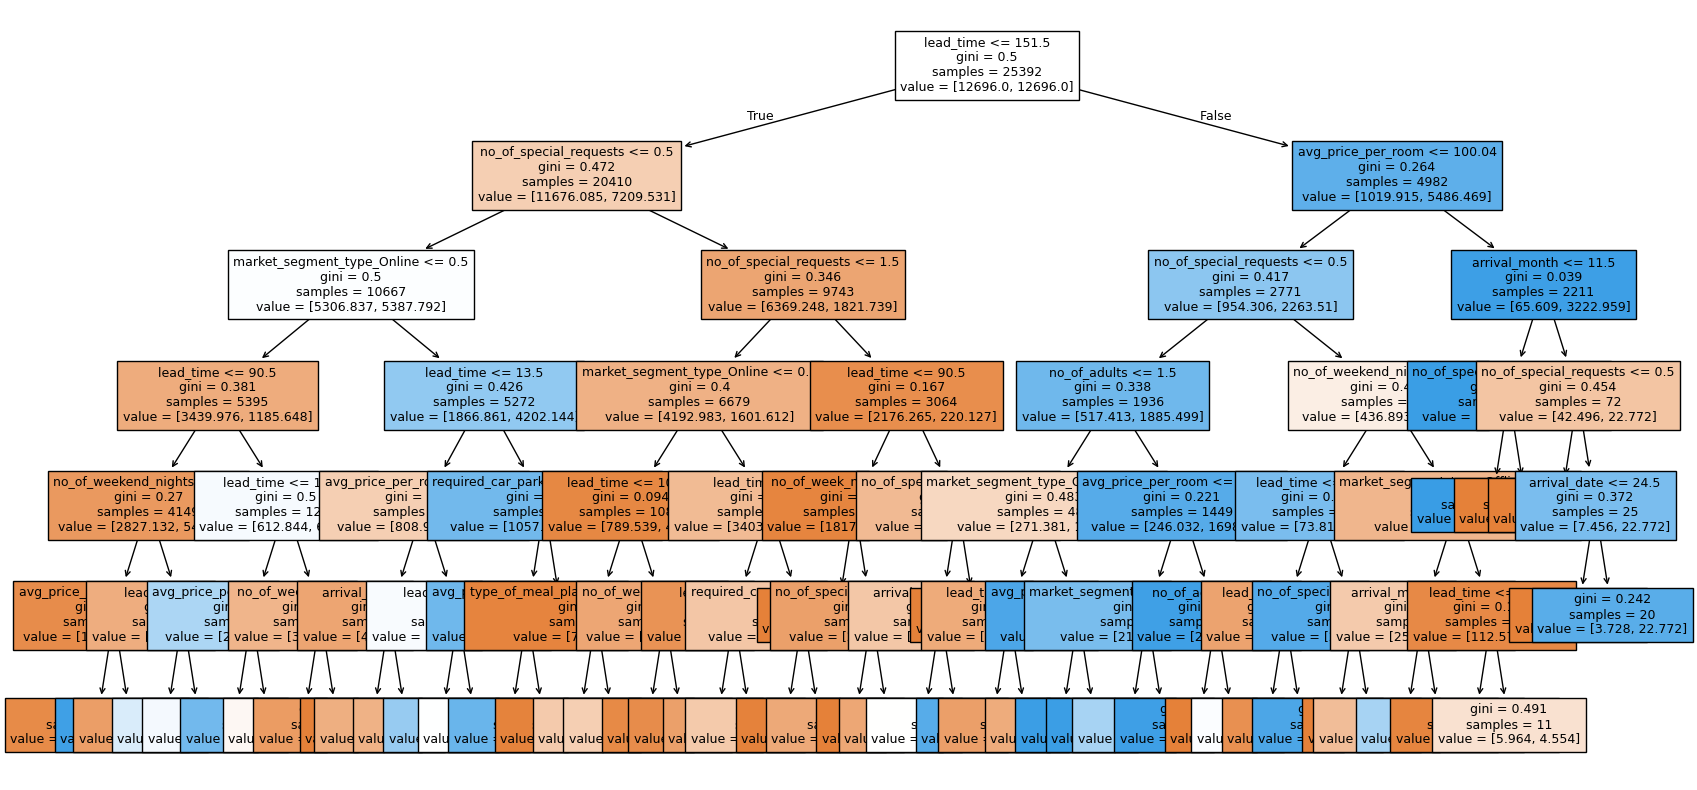

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
#Text showing the different rules of the decision tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

* The tree has become simpler and the rules of the
trees are readable.
* Model performance of the model is generalized.
* The most important factors are:
  * Lead time
  * Market segment - Online
  * No of special request
  * Avg price per room
* The rules show that lead time plays a key role in identifying if a
booking will be cancelled or not. 151 days has been considered as a
threshold value by the model to make the first split.

Bookings made more than 151 days before the date of arrival:
* If the average price per room is greater than 100 euros and the arrival
month is December, then the the booking is less likely to be
cancelled.
* If the average price per room is less than or equal to 100 euros and
the number of special request is 0, then the booking is likely to get
canceled.

Bookings made under 151 days before the date of arrival:
* If a customer has at least 1 special request the booking is less likely
to be cancelled.
* If the customer didn't make any special requests and the booking
was done Online it is more likely to get cancelled, if the booking was
not done online, it is less likely to be cancelled.

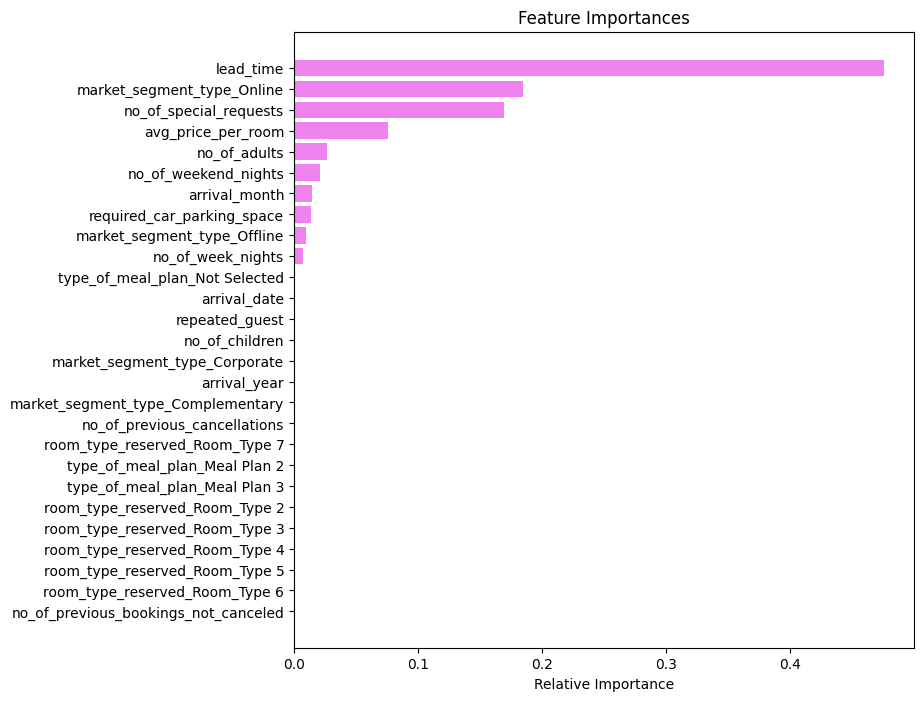

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Cost Complexity Pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.008376
1,0.000000e+00,0.008376
2,2.933821e-20,0.008376
3,2.933821e-20,0.008376
4,2.933821e-20,0.008376
...,...,...
1839,8.901596e-03,0.328058
1840,9.802243e-03,0.337860
1841,1.271875e-02,0.350579
1842,3.412090e-02,0.418821


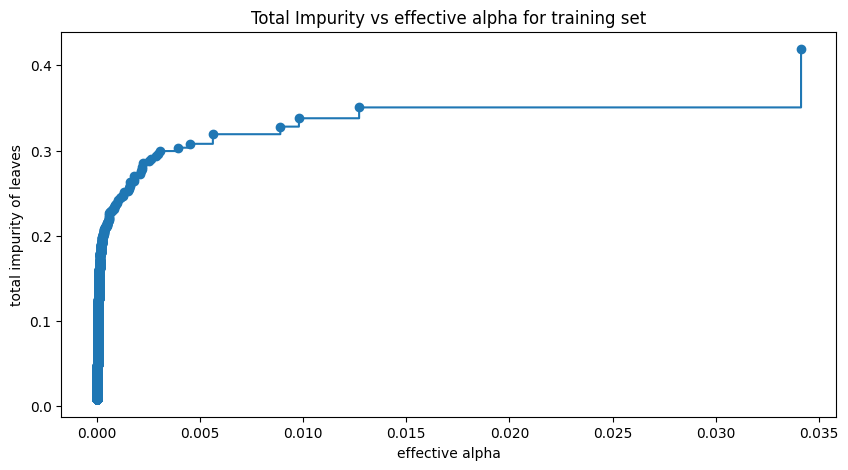

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* Training the decision tree using effective alphas. The last value in
ccp_alphas is the alpha value that prunes the whole tree, leaving the tree,
clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


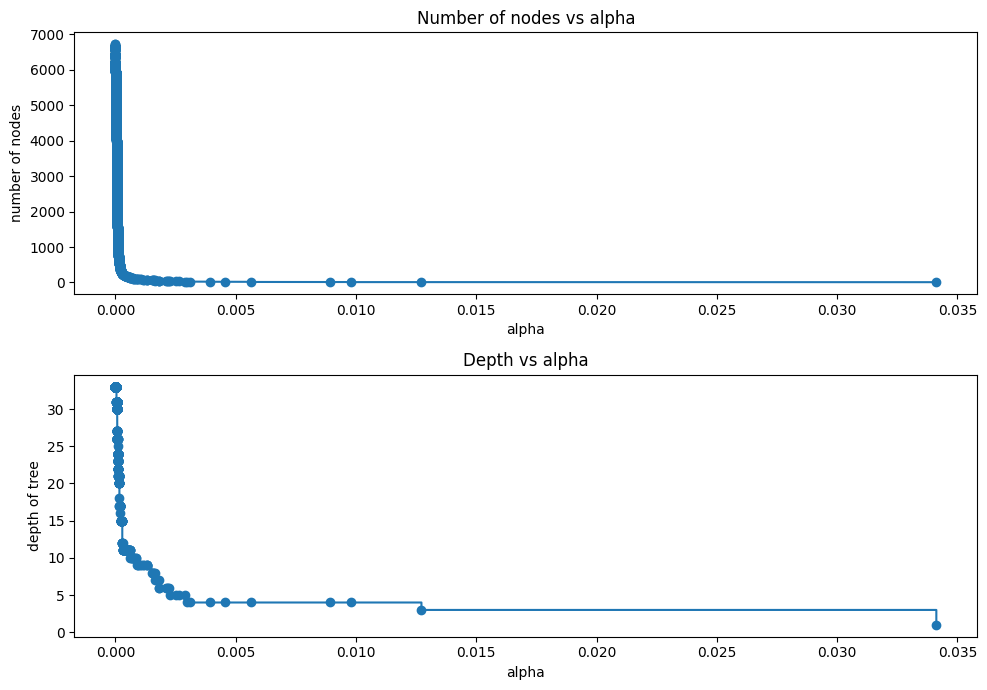

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

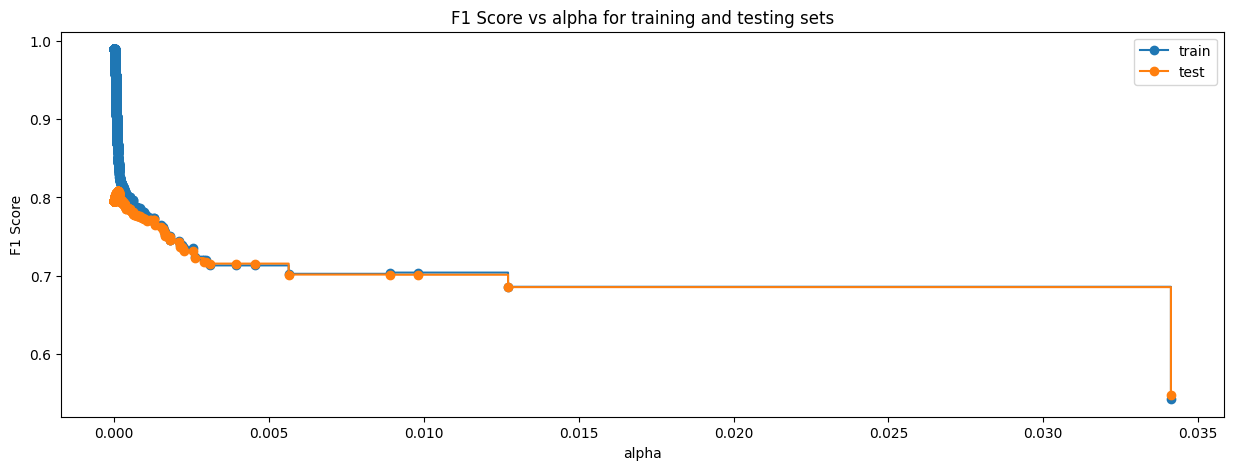

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")

# Ensure ccp_alphas and f1_train have the same length
ccp_alphas = ccp_alphas[:len(f1_train)]  # Trim ccp_alphas to match f1_train

ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


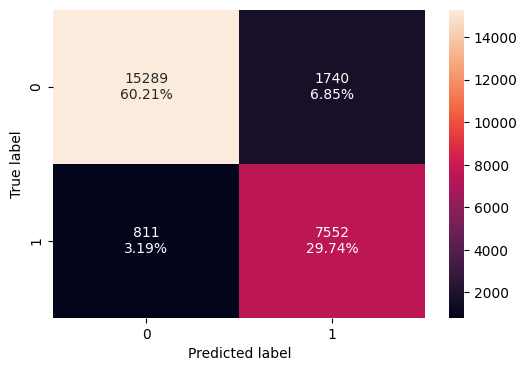

In [ ]:
#Confusion Matrix
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
#Metrics
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.899535,0.903025,0.812742,0.855508


**Checking the performance on the test set**

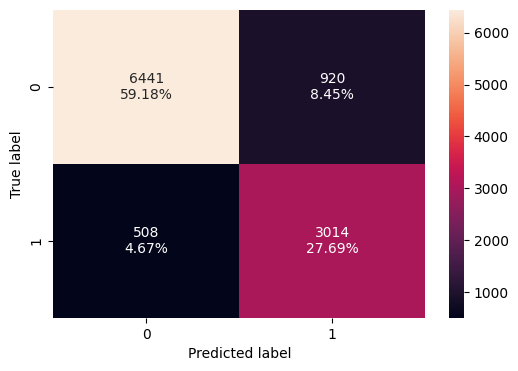

In [ ]:
#Confusion Matrix
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
#Metrics
decision_tree_test =  model_performance_classification_sklearn(best_model,X_train,y_train)
decision_tree_test

,Accuracy,Recall,Precision,F1
0,0.899535,0.903025,0.812742,0.855508


* Post pruning the decision tree the performance has generalized on training and test set.
* There is a high recall with this model but difference between recall and precision has increased.

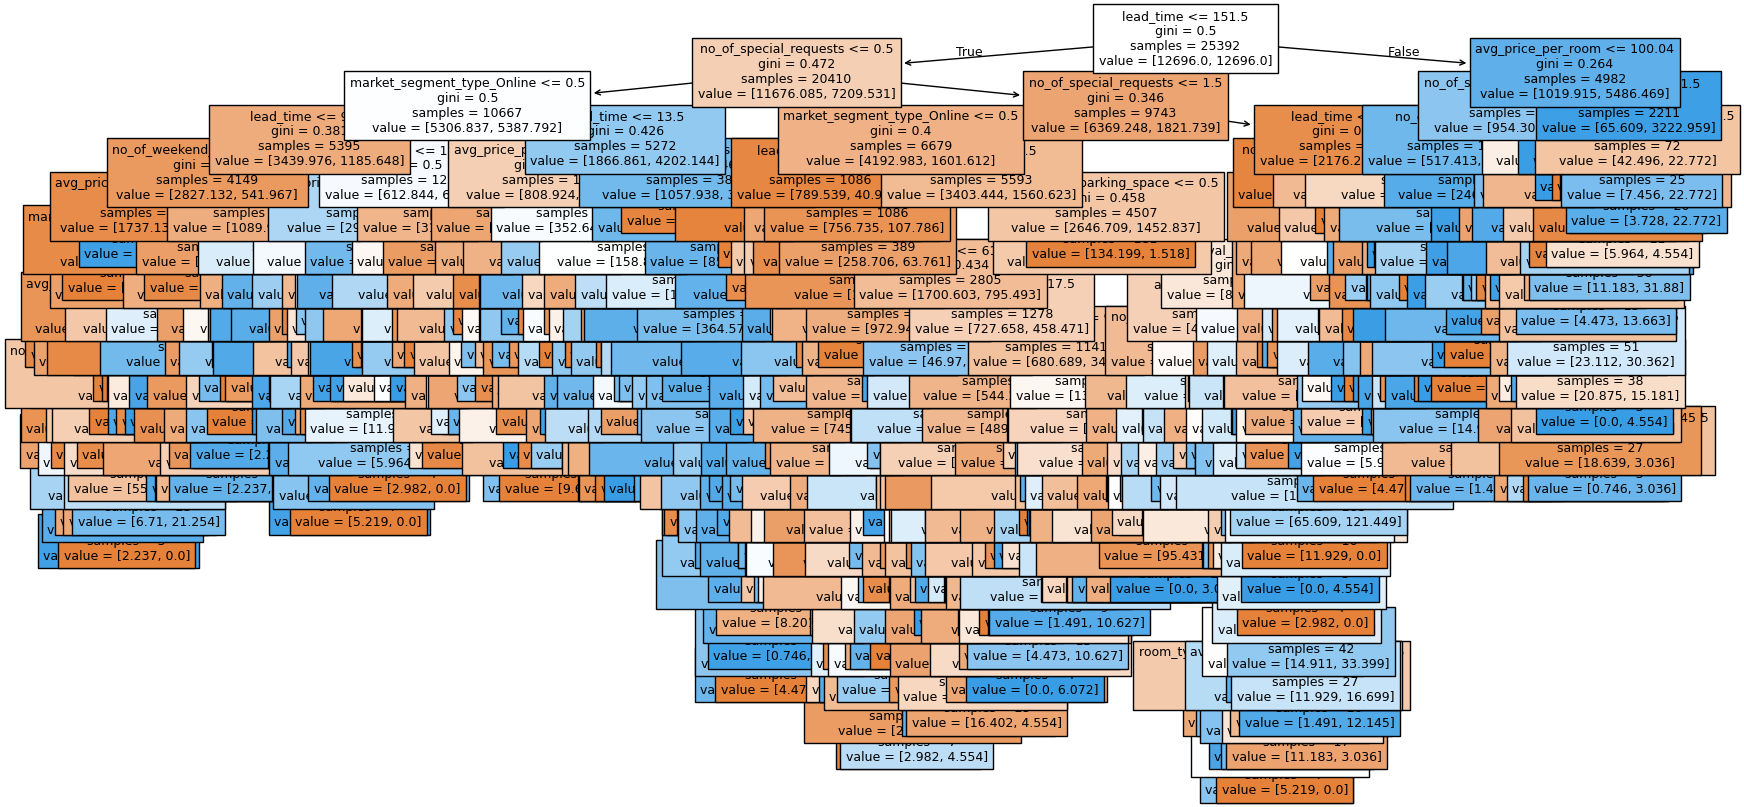

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

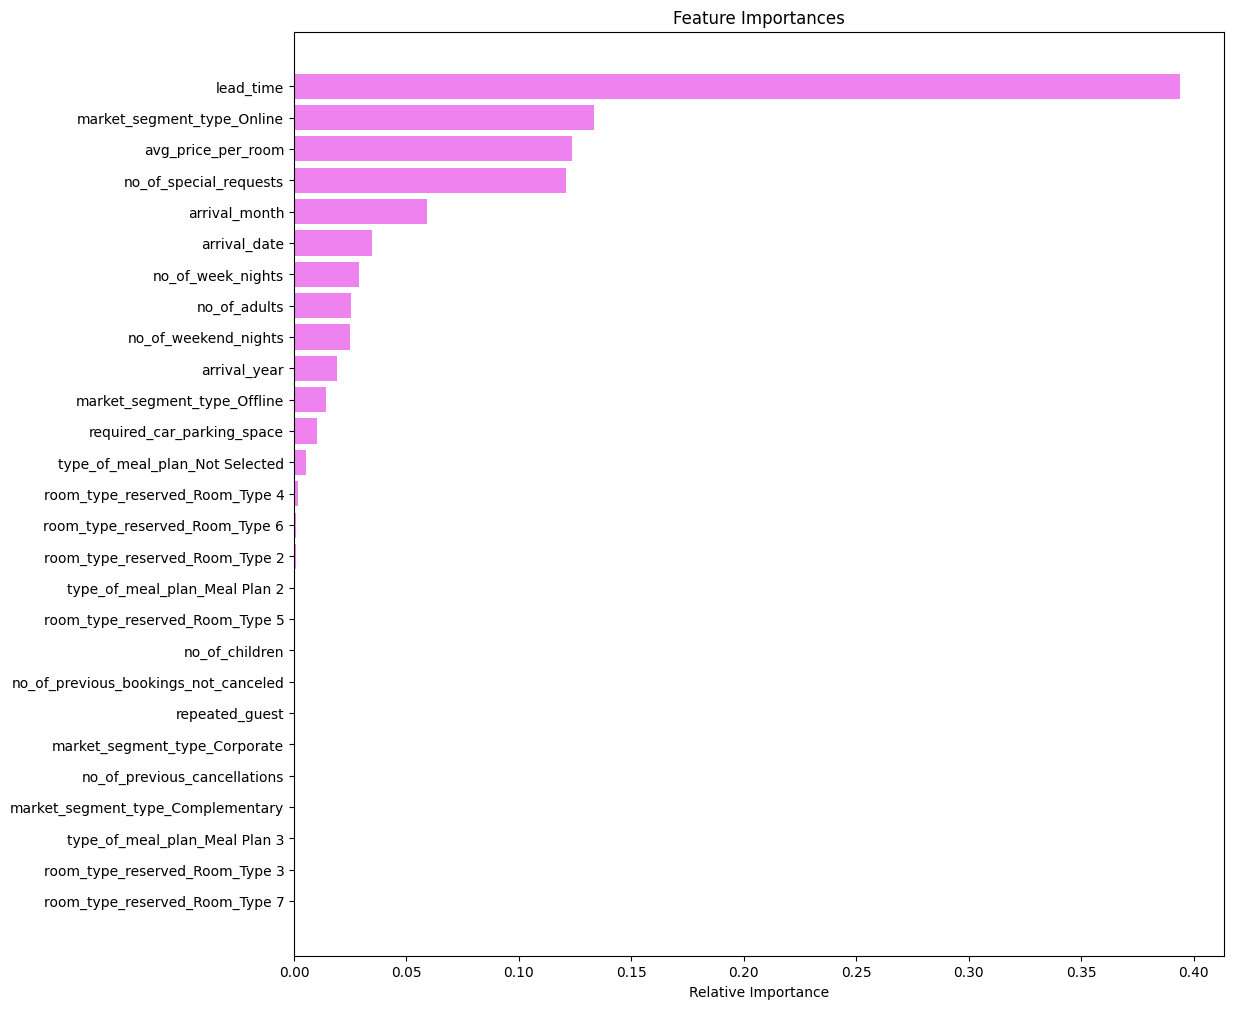

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Tree is very complex compared to the pre-pruned tree.
* Feature importance is the same as the pre-pruned tree.

**Comparing decision tree models**

In [ ]:
#Training performance comparison
models_train_comp_df = pd.concat(
    [
      decision_tree_perf_train_default.T,
       decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.994211,0.830970,0.899535
Recall,0.986608,0.786082,0.903025
Precision,0.995776,0.724248,0.812742
F1,0.991171,0.753899,0.855508


In [ ]:
#Testing performance comparison
models_test_comp_df = pd.concat(
[
    decision_tree_perf_test_default.T,
    decision_tree_tune_perf_test.T,
    decision_tree_test.T,

],
axis=1,)

models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.871175,0.834972,0.899535
Recall,0.811755,0.783362,0.903025
Precision,0.794608,0.727584,0.812742
F1,0.803090,0.754444,0.855508


* Decision tree model with default parameters is overfitting the training data and does not generalize well.
* There is a generalized performance with balanced values of precision and recall with pre-pruned tree.
* Post-pruned tree has a high F1 score compared to other models but the difference between precision and recall is high.
* Using the pre-pruned decision tree model the hotel will be able to maintain a balance between resources and the brand equity.

# Business Recommendations

* The hotel should implement stricter cancellation policies: Reservations with specific demands and high average room prices shouldn't receive a complete refund because there will be a significant loss in resource. Although it would be ideal for cancellation procedures to be uniform across all market groups, the data shows that a significant portion of online reservations are cancelled. Customers that cancel their reservations online should receive a less amount of refund.
* When determining whether or not to cancel a reservation, the lead time and the quantity of specific requests made by the client are crucial factors. Reservations made with a special request from a customer and made less than 151 days prior to the arrival date are less likely to be cancelled.
* Before the customers' arrival date, set up a system that can automatically send them an email asking for a confirmation of their reservation and any adjustments they would like to make.
* December and January have a low cancellation to noncancellation ratio. Consumers may take trips to enjoy the holidays and the new year. The hotel should make sure that there are adequate staff members on hand to meet the needs of the visitors.
* The busiest months for bookings and cancellations were October and September. The hotel needs to look into this more thoroughly.
* According to our analysis, there aren't many repeat clients, and those that do exist have very low cancellation rates, which is encouraging because repeat business is crucial to the hospitality sector because it can help spread the word. Compared to returning consumers, attracting new ones is time-consuming and more expensive.
* These consumers' experience can be enhanced by a loyalty program that provides them with exclusive discounts, hotel amenities, etc.

